In [1]:
#Import all necessary packages
from nn_packages import *
from io_functions import *
import numpy as np
import root_numpy as rnp
import os
import sys
import re
import glob
import h5py
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.advanced_activations import *
import keras
from keras import models
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)
Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


Welcome to ROOTaaS 6.06/04


In [9]:
#ConvNet - 2D, 11/7
early = EarlyStopping(monitor='val_loss', patience=8, verbose=1, mode='auto')
cnn2d = Sequential()
cnn2d.add(Convolution2D(10, 4, 4, input_shape = (25, 20, 20), activation='relu'))
cnn2d.add(MaxPooling2D())
cnn2d.add(Flatten())

#Dense layer
cnn2d.add(Dense(10000, activation='sigmoid'))
cnn2d.add(Dense(100, activation='sigmoid'))
cnn2d.add(Dropout(0.5))
cnn2d.add(Dense(10, activation='sigmoid'))
cnn2d.add(Dense(1, activation='linear'))
#sgd=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=True)
cnn2d.compile(loss='mse', optimizer='sgd')
#simple.load_weights('first_try.h5')
cnn2d.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
convolution2d_5 (Convolution2D)    (None, 10, 17, 17)  4010        convolution2d_input_5[0][0]      
____________________________________________________________________________________________________
maxpooling2d_5 (MaxPooling2D)      (None, 10, 8, 8)    0           convolution2d_5[0][0]            
____________________________________________________________________________________________________
flatten_5 (Flatten)                (None, 640)         0           maxpooling2d_5[0][0]             
____________________________________________________________________________________________________
dense_17 (Dense)                   (None, 10000)       6410000     flatten_5[0][0]                  
___________________________________________________________________________________________

10
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0698 - val_loss: 0.0451
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0688 - val_loss: 0.0445
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0669 - val_loss: 0.0431
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0644 - val_loss: 0.0426
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0643 - val_loss: 0.0419
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0629 - val_loss: 0.0409
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0633 - val_loss: 0.0401
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0626 - val_loss: 0.0400
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0603 - val_loss: 0.0392
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0590 - val_loss: 0.0384


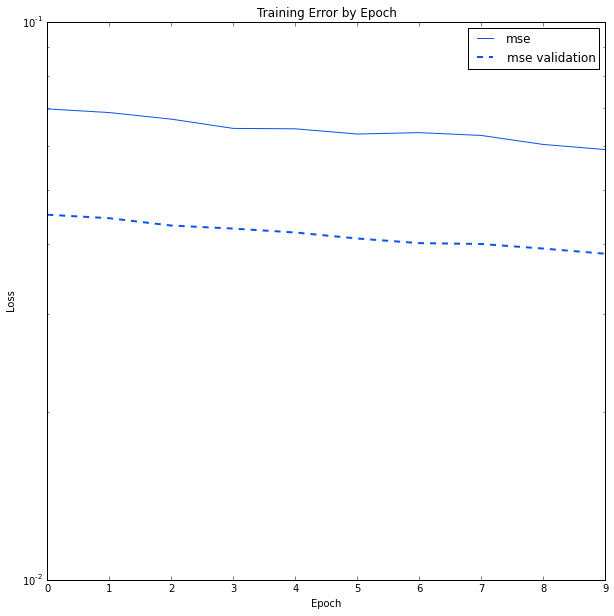

11
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 61s - loss: 0.0542 - val_loss: 0.0340
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0529 - val_loss: 0.0333
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0536 - val_loss: 0.0329
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0534 - val_loss: 0.0327
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0522 - val_loss: 0.0320
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0520 - val_loss: 0.0312
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0524 - val_loss: 0.0311
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0505 - val_loss: 0.0303
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0488 - val_loss: 0.0299
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0488 - val_loss: 0.0294


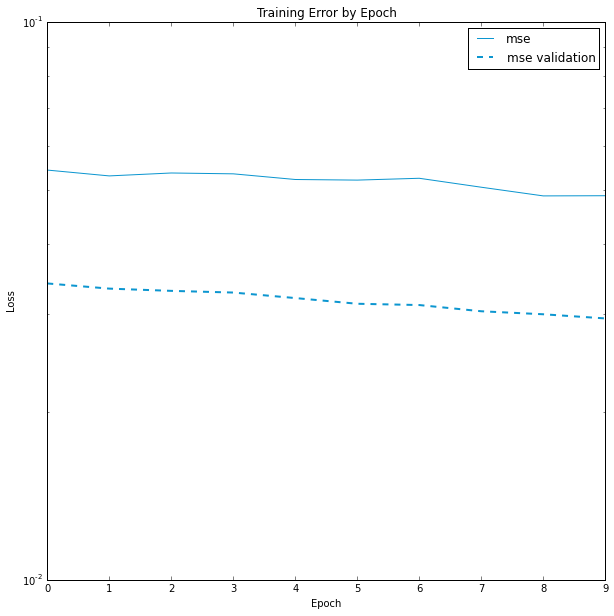

12
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0473 - val_loss: 0.0281
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0473 - val_loss: 0.0274
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0465 - val_loss: 0.0270
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0471 - val_loss: 0.0270
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0461 - val_loss: 0.0263
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0442 - val_loss: 0.0257
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0443 - val_loss: 0.0257
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0443 - val_loss: 0.0251
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0428 - val_loss: 0.0251
Epoch 10/10
8000/8000 [==============================] - 5s - loss: 0.0427 - val_loss: 0.0247


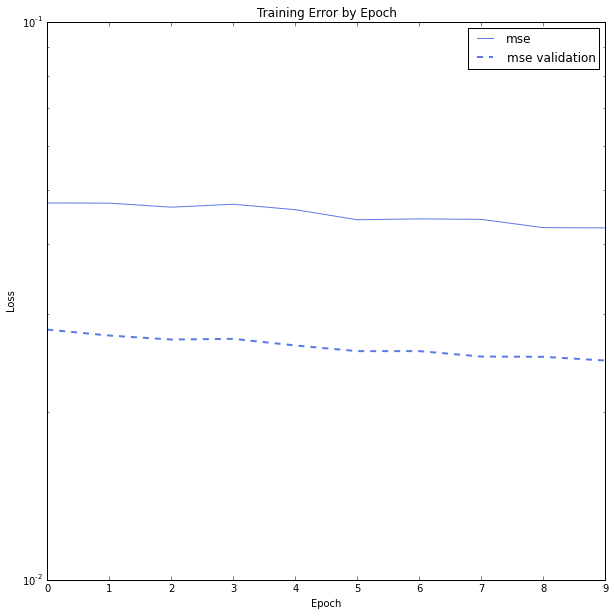

14
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0410 - val_loss: 0.0236
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0408 - val_loss: 0.0232
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0407 - val_loss: 0.0230
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0396 - val_loss: 0.0230
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0404 - val_loss: 0.0227
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0388 - val_loss: 0.0223
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0391 - val_loss: 0.0225
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0394 - val_loss: 0.0220
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0379 - val_loss: 0.0219
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0378 - val_loss: 0.0218


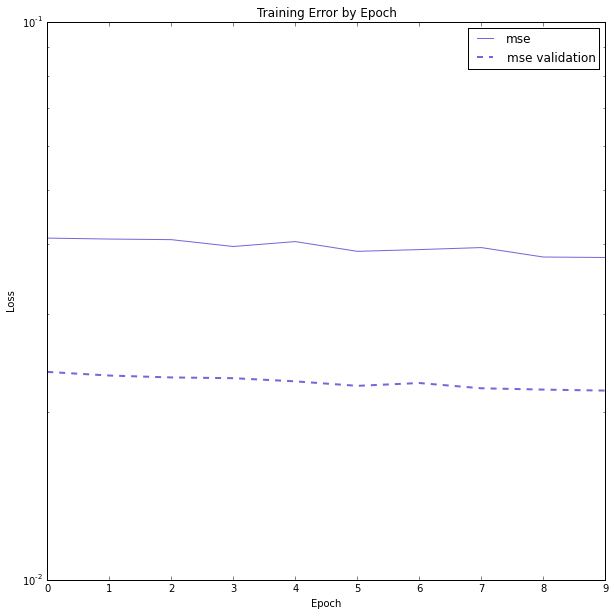

15
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0439 - val_loss: 0.0231
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0425 - val_loss: 0.0232
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0417 - val_loss: 0.0233
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0413 - val_loss: 0.0228
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0403 - val_loss: 0.0225
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0394 - val_loss: 0.0222
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0414 - val_loss: 0.0221
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0408 - val_loss: 0.0219
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0386 - val_loss: 0.0216
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0392 - val_loss: 0.0216


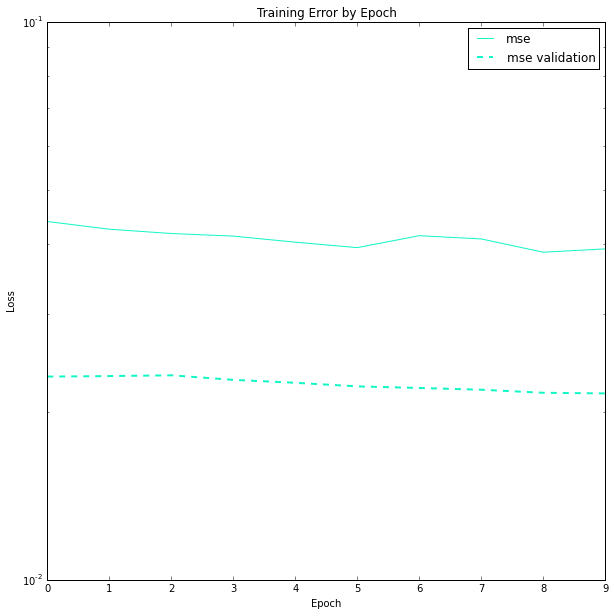

16
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0362 - val_loss: 0.0221
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0354 - val_loss: 0.0210
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0361 - val_loss: 0.0206
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0351 - val_loss: 0.0202
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0352 - val_loss: 0.0202
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0348 - val_loss: 0.0201
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0342 - val_loss: 0.0197
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0340 - val_loss: 0.0197
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0341 - val_loss: 0.0195
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0338 - val_loss: 0.0194


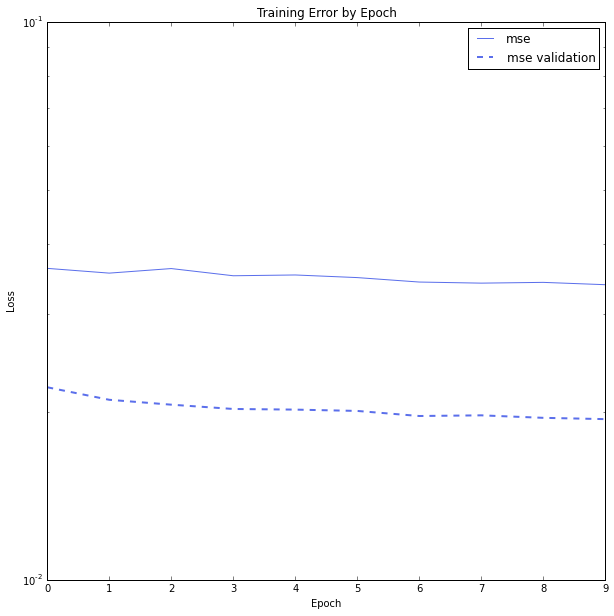

17
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0356 - val_loss: 0.0190
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0357 - val_loss: 0.0192
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0354 - val_loss: 0.0191
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0357 - val_loss: 0.0190
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0343 - val_loss: 0.0185
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0353 - val_loss: 0.0186
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0347 - val_loss: 0.0185
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0336 - val_loss: 0.0182
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0351 - val_loss: 0.0182
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0333 - val_loss: 0.0178


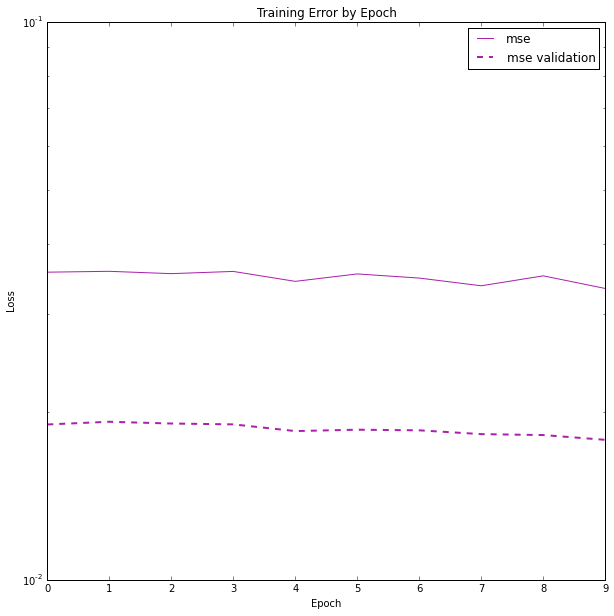

18
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0359 - val_loss: 0.0210
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0365 - val_loss: 0.0211
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0352 - val_loss: 0.0209
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0356 - val_loss: 0.0208
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0355 - val_loss: 0.0204
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0344 - val_loss: 0.0202
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0350 - val_loss: 0.0199
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0352 - val_loss: 0.0197
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0339 - val_loss: 0.0197
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0343 - val_loss: 0.0195


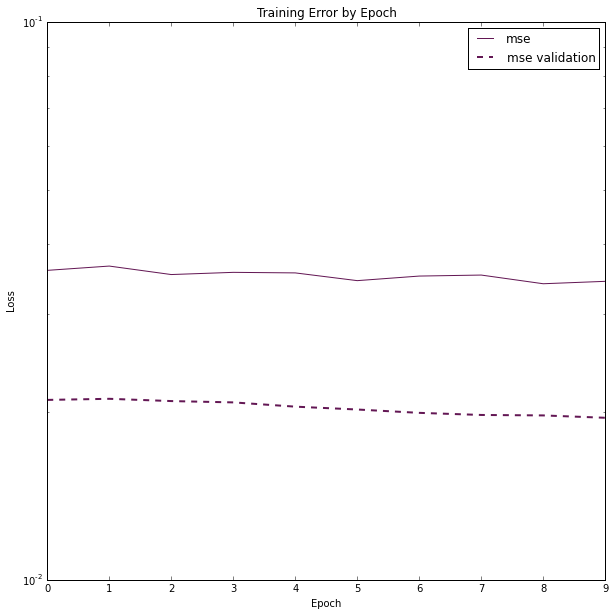

19
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0317 - val_loss: 0.0174
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0170
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0312 - val_loss: 0.0168
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0315 - val_loss: 0.0164
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0309 - val_loss: 0.0166
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0306 - val_loss: 0.0163
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0300 - val_loss: 0.0160
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0301 - val_loss: 0.0160
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0303 - val_loss: 0.0160
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0289 - val_loss: 0.0158


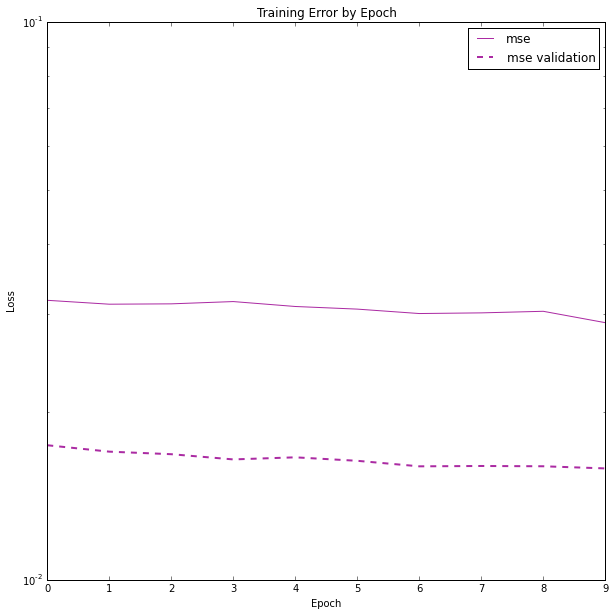

20
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0306 - val_loss: 0.0163
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0298 - val_loss: 0.0163
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0298 - val_loss: 0.0163
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0295 - val_loss: 0.0163
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0294 - val_loss: 0.0162
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0292 - val_loss: 0.0160
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0293 - val_loss: 0.0160
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0293 - val_loss: 0.0157
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0292 - val_loss: 0.0156
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0290 - val_loss: 0.0156


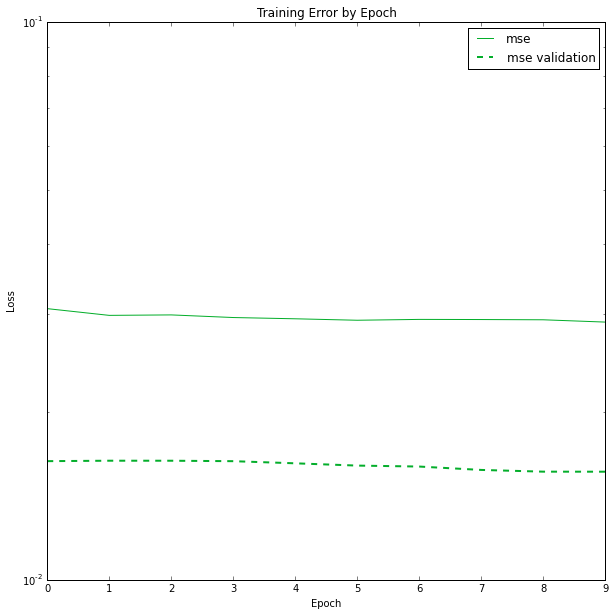

21
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0287 - val_loss: 0.0151
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0149
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0150
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0148
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0149
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0280 - val_loss: 0.0147
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0267 - val_loss: 0.0148
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0146
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0145
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0145


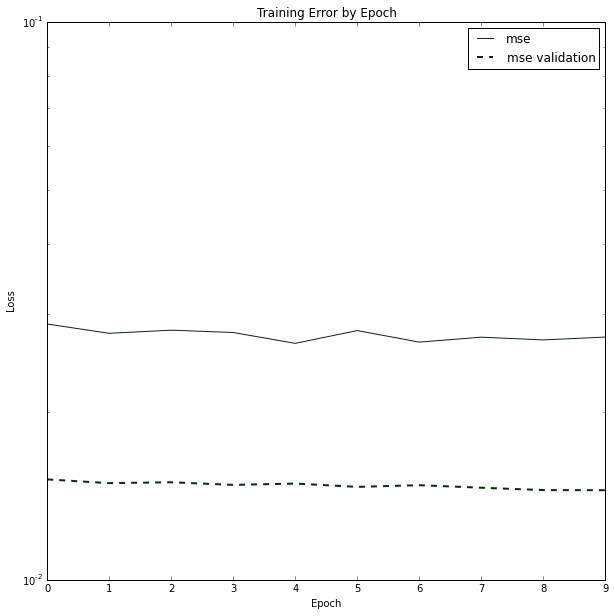

22
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0152
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0269 - val_loss: 0.0151
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0271 - val_loss: 0.0151
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0277 - val_loss: 0.0150
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0272 - val_loss: 0.0148
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0266 - val_loss: 0.0148
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0149
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0270 - val_loss: 0.0145
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0265 - val_loss: 0.0146
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0262 - val_loss: 0.0145


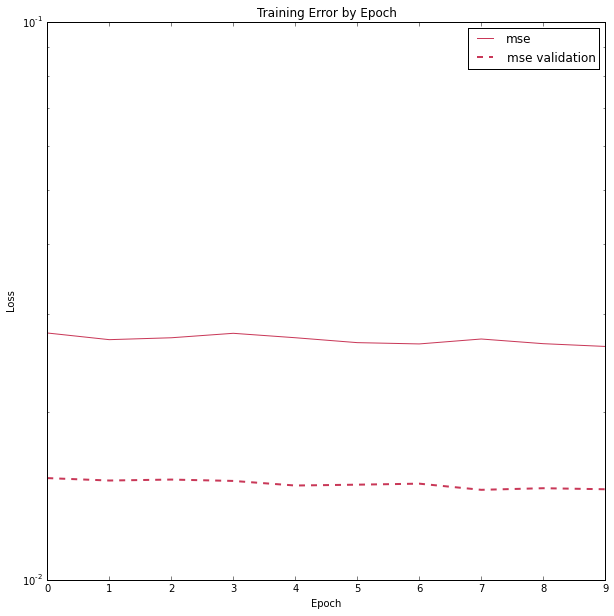

23
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0130
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0256 - val_loss: 0.0127
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0255 - val_loss: 0.0126
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0250 - val_loss: 0.0125
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0246 - val_loss: 0.0124
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0244 - val_loss: 0.0123
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0123
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0246 - val_loss: 0.0120
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0245 - val_loss: 0.0122
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0249 - val_loss: 0.0122


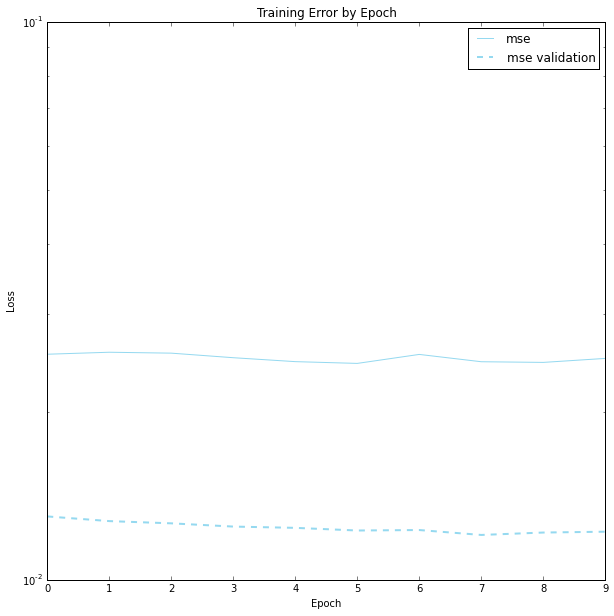

24
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0140
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0254 - val_loss: 0.0142
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0245 - val_loss: 0.0141
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0246 - val_loss: 0.0142
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0247 - val_loss: 0.0140
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0244 - val_loss: 0.0139
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0246 - val_loss: 0.0139
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0242 - val_loss: 0.0138
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0246 - val_loss: 0.0139
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0242 - val_loss: 0.0137


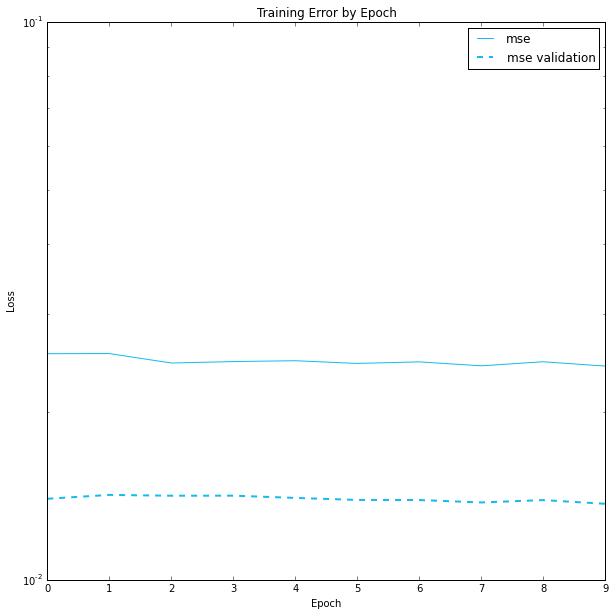

25
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0252 - val_loss: 0.0136
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0247 - val_loss: 0.0134
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0241 - val_loss: 0.0135
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0245 - val_loss: 0.0133
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0241 - val_loss: 0.0133
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0252 - val_loss: 0.0133
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0253 - val_loss: 0.0131
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0242 - val_loss: 0.0132
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0244 - val_loss: 0.0131
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0234 - val_loss: 0.0129


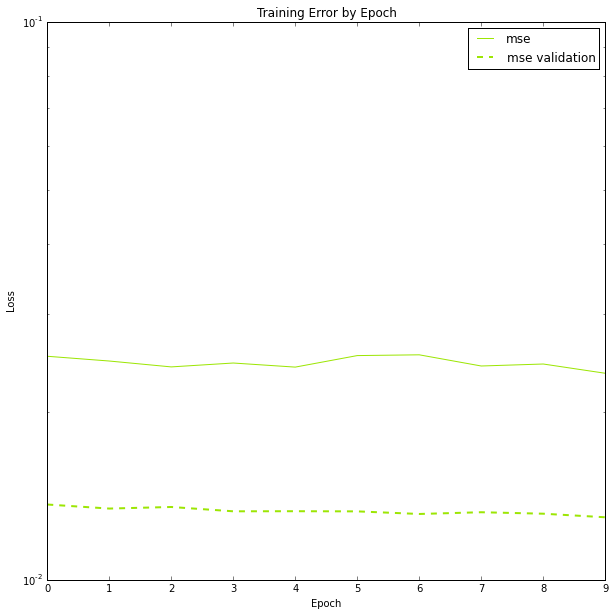

26
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0230 - val_loss: 0.0123
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0224 - val_loss: 0.0123
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0228 - val_loss: 0.0124
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0230 - val_loss: 0.0122
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0227 - val_loss: 0.0119
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0221 - val_loss: 0.0119
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0223 - val_loss: 0.0119
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0230 - val_loss: 0.0119
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0222 - val_loss: 0.0117
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0220 - val_loss: 0.0118


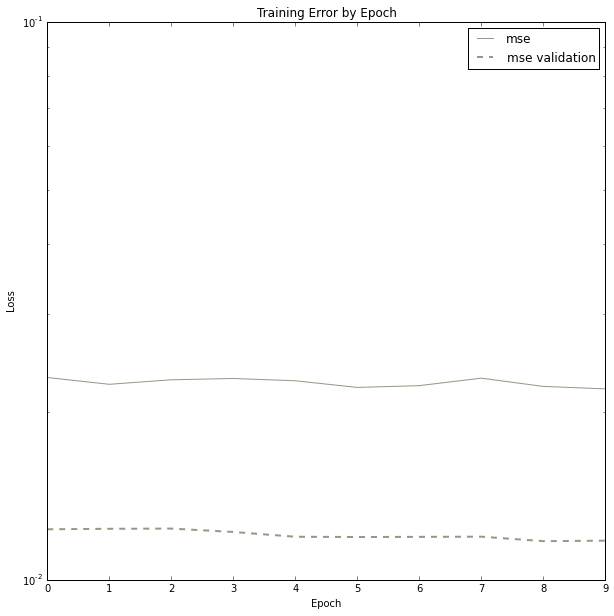

27
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0225 - val_loss: 0.0114
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0228 - val_loss: 0.0112
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0223 - val_loss: 0.0111
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0222 - val_loss: 0.0113
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0221 - val_loss: 0.0113
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0220 - val_loss: 0.0111
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0221 - val_loss: 0.0110
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0222 - val_loss: 0.0112
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0226 - val_loss: 0.0111
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0223 - val_loss: 0.0111


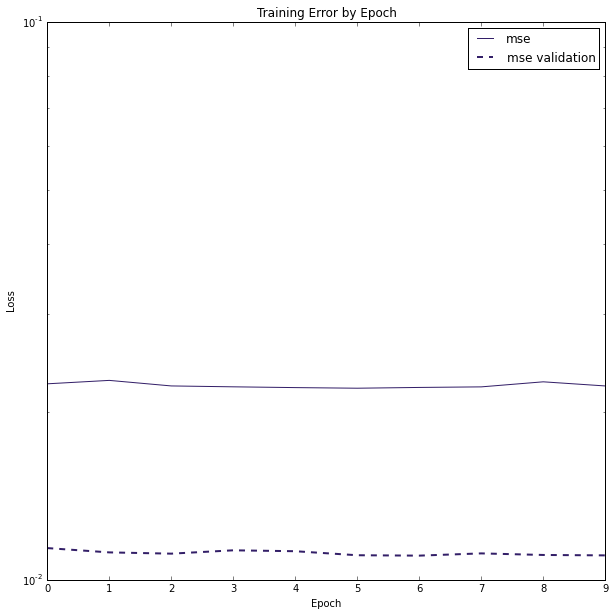

28
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0221 - val_loss: 0.0113
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0218 - val_loss: 0.0113
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0220 - val_loss: 0.0113
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0225 - val_loss: 0.0112
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0220 - val_loss: 0.0113
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0219 - val_loss: 0.0113
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0218 - val_loss: 0.0112
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0212 - val_loss: 0.0110
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0217 - val_loss: 0.0111
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0215 - val_loss: 0.0111


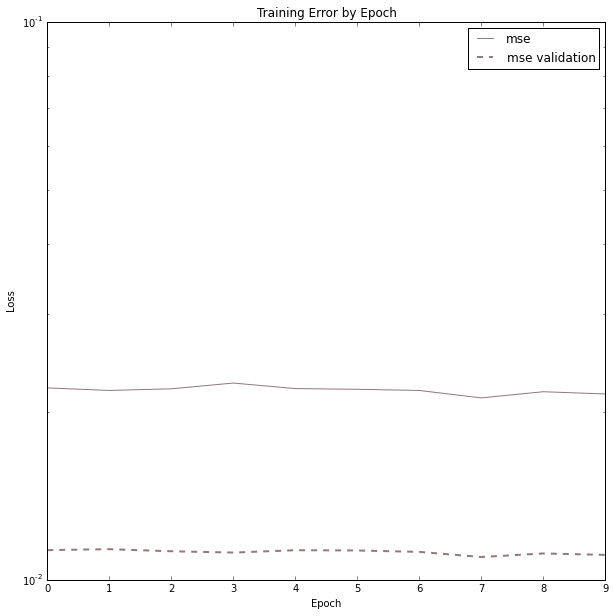

29
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0226 - val_loss: 0.0106
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0228 - val_loss: 0.0107
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0221 - val_loss: 0.0108
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0223 - val_loss: 0.0108
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0221 - val_loss: 0.0107
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0225 - val_loss: 0.0107
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0216 - val_loss: 0.0108
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0225 - val_loss: 0.0107
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0215 - val_loss: 0.0106
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0216 - val_loss: 0.0106


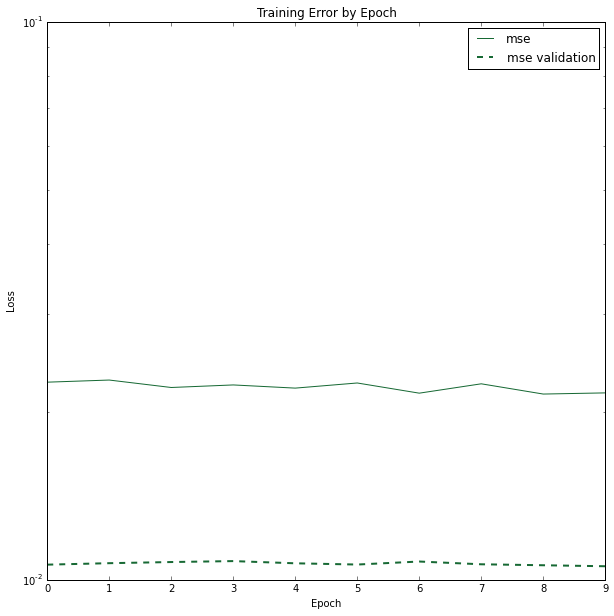

30
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0212 - val_loss: 0.0117
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0211 - val_loss: 0.0115
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0213 - val_loss: 0.0115
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0210 - val_loss: 0.0115
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0211 - val_loss: 0.0113
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0208 - val_loss: 0.0113
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0206 - val_loss: 0.0113
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0205 - val_loss: 0.0112
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0211 - val_loss: 0.0114
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0206 - val_loss: 0.0113


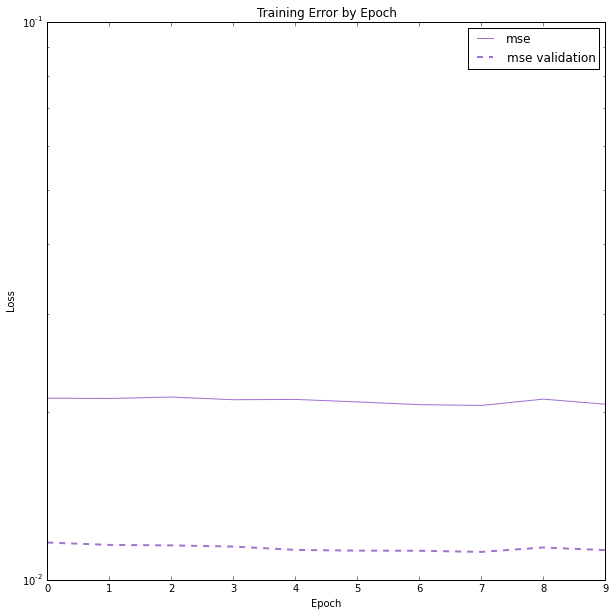

31
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0209 - val_loss: 0.0110
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0221 - val_loss: 0.0111
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0214 - val_loss: 0.0112
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0206 - val_loss: 0.0112
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0208 - val_loss: 0.0111
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0210 - val_loss: 0.0111
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0217 - val_loss: 0.0112
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0205 - val_loss: 0.0111
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0205 - val_loss: 0.0111
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0203 - val_loss: 0.0111


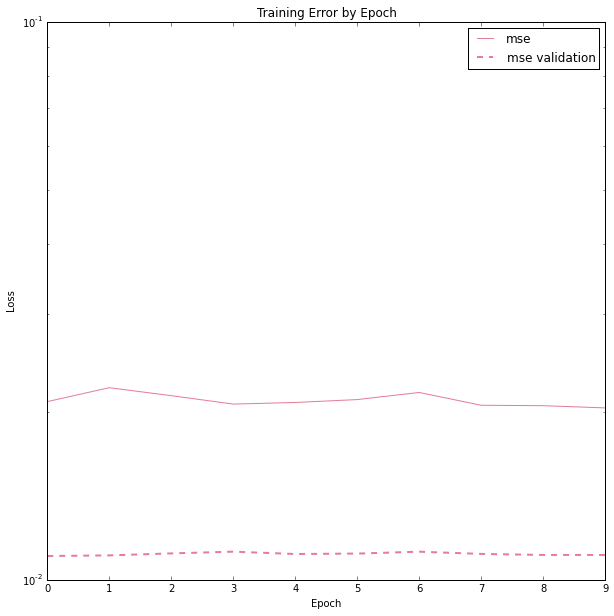

32
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0204 - val_loss: 0.0087
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0205 - val_loss: 0.0086
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0202 - val_loss: 0.0084
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0200 - val_loss: 0.0084
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0196 - val_loss: 0.0085
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0205 - val_loss: 0.0086
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0199 - val_loss: 0.0084
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0200 - val_loss: 0.0084
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0205 - val_loss: 0.0085
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0193 - val_loss: 0.0084


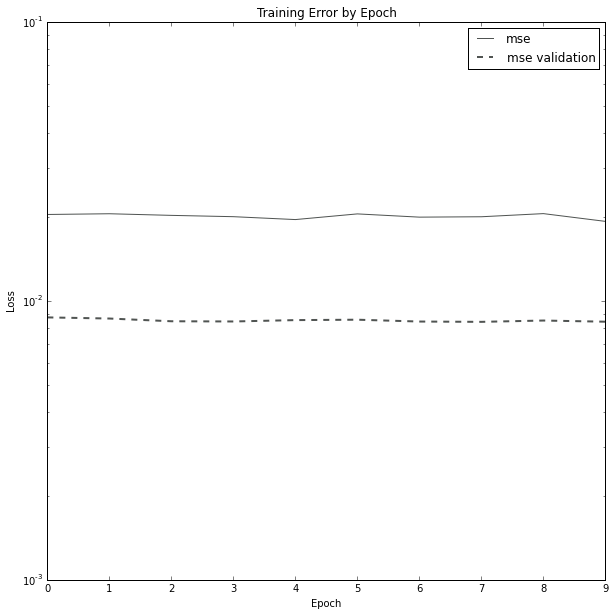

33
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0209 - val_loss: 0.0100
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0208 - val_loss: 0.0101
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0209 - val_loss: 0.0102
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0211 - val_loss: 0.0102
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0210 - val_loss: 0.0101
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0203 - val_loss: 0.0100
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0200 - val_loss: 0.0100
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0209 - val_loss: 0.0101
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0203 - val_loss: 0.0100
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0205 - val_loss: 0.0099


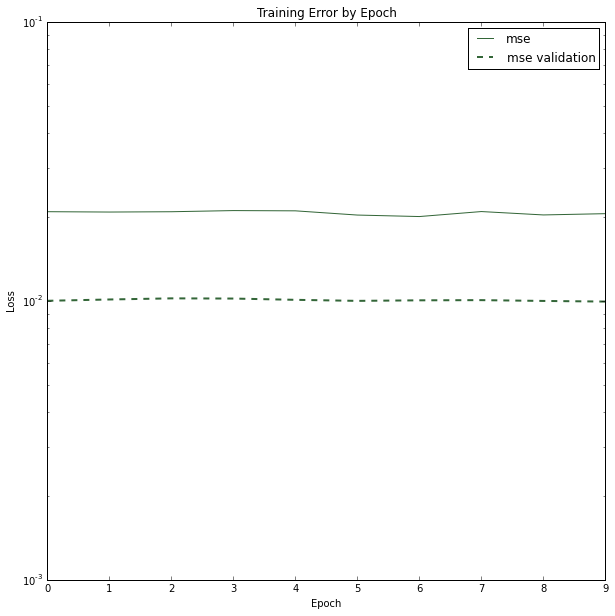

34
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0187 - val_loss: 0.0097
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0182 - val_loss: 0.0095
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0180 - val_loss: 0.0094
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0184 - val_loss: 0.0094
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0183 - val_loss: 0.0093
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0182 - val_loss: 0.0093
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0177 - val_loss: 0.0093
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0180 - val_loss: 0.0093
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0181 - val_loss: 0.0093
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0181 - val_loss: 0.0093


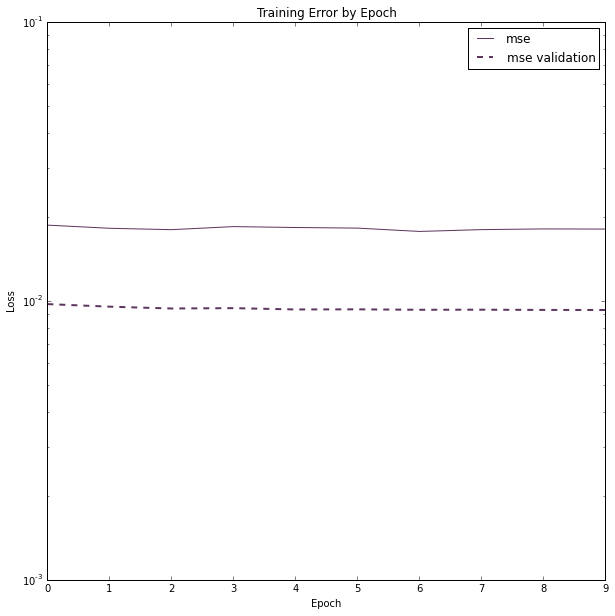

35
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0200 - val_loss: 0.0096
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0195 - val_loss: 0.0098
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0191 - val_loss: 0.0098
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0198 - val_loss: 0.0100
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0200 - val_loss: 0.0099
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0197 - val_loss: 0.0098
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0197 - val_loss: 0.0098
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0193 - val_loss: 0.0098
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0197 - val_loss: 0.0097
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0200 - val_loss: 0.0097


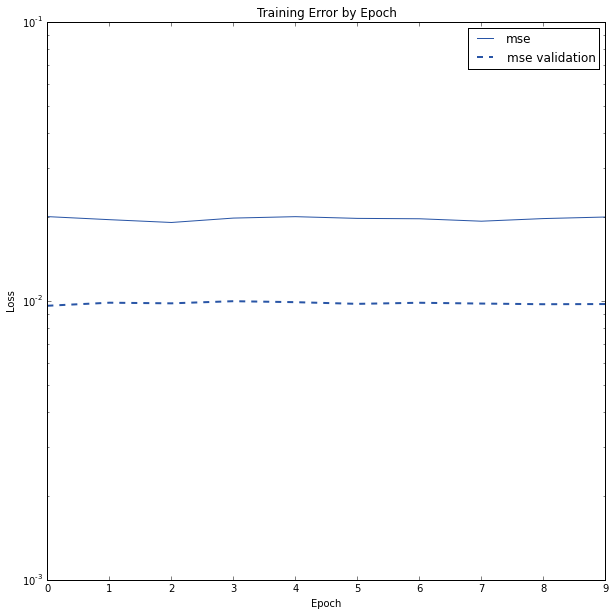

36
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0182 - val_loss: 0.0093
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0180 - val_loss: 0.0090
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0179 - val_loss: 0.0090
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0177 - val_loss: 0.0089
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0177 - val_loss: 0.0090
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0182 - val_loss: 0.0090
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0174 - val_loss: 0.0089
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0176 - val_loss: 0.0088
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0174 - val_loss: 0.0088
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0174 - val_loss: 0.0087


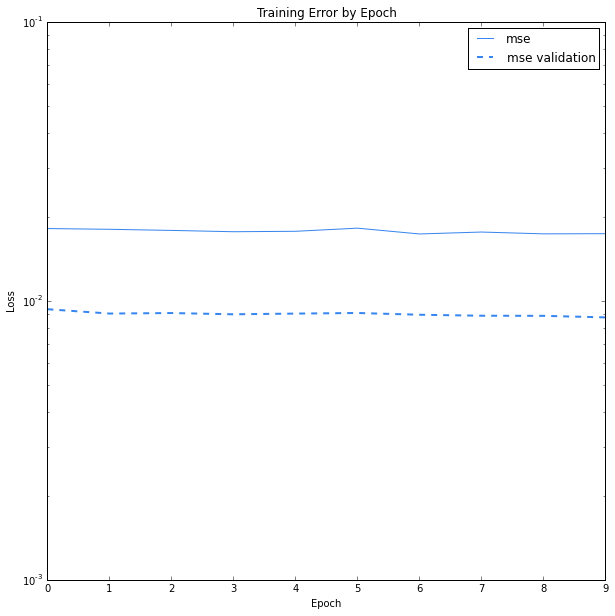

37
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0184 - val_loss: 0.0094
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0180 - val_loss: 0.0095
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0176 - val_loss: 0.0095
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0178 - val_loss: 0.0095
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0177 - val_loss: 0.0093
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0176 - val_loss: 0.0093
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0177 - val_loss: 0.0092
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0177 - val_loss: 0.0092
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0180 - val_loss: 0.0093
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0179 - val_loss: 0.0092


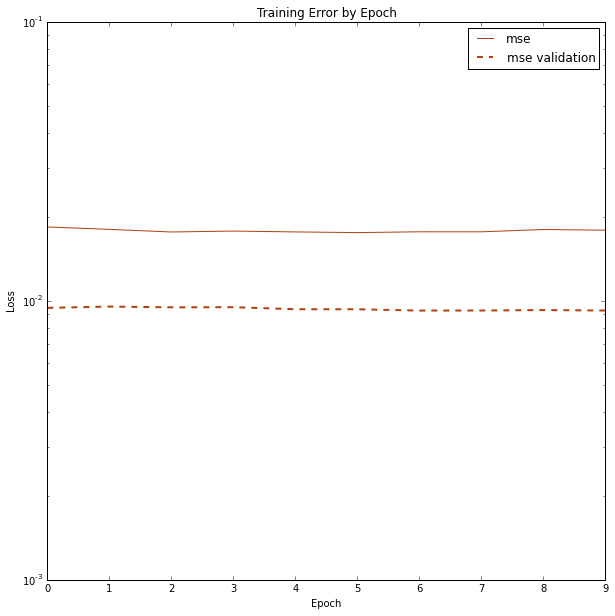

38
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0169 - val_loss: 0.0086
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0165 - val_loss: 0.0084
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0166 - val_loss: 0.0084
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0168 - val_loss: 0.0084
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0164 - val_loss: 0.0083
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0165 - val_loss: 0.0082
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0164 - val_loss: 0.0082
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0172 - val_loss: 0.0082
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0166 - val_loss: 0.0083
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0164 - val_loss: 0.0082


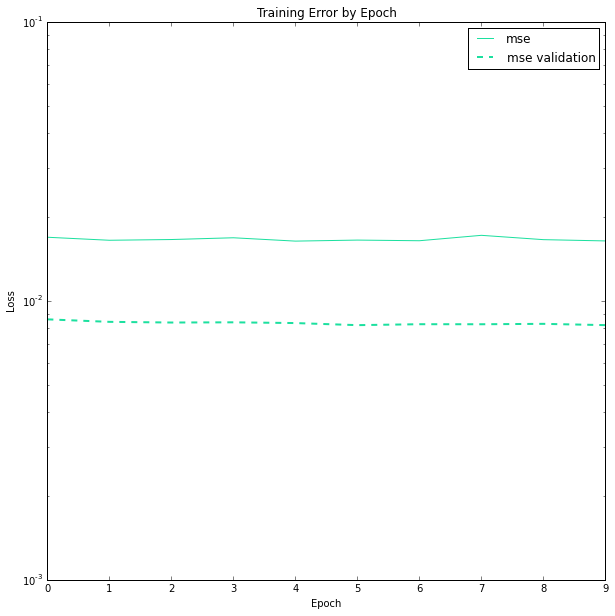

39
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0165 - val_loss: 0.0082
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0165 - val_loss: 0.0084
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0161 - val_loss: 0.0083
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0168 - val_loss: 0.0083
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0167 - val_loss: 0.0083
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0164 - val_loss: 0.0083
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0161 - val_loss: 0.0081
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0162 - val_loss: 0.0082
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0164 - val_loss: 0.0081
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0168 - val_loss: 0.0081


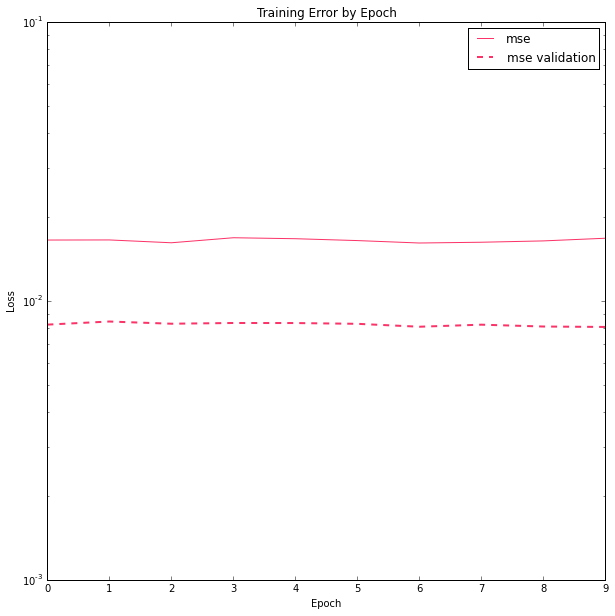

40
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0166 - val_loss: 0.0085
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0169 - val_loss: 0.0084
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0170 - val_loss: 0.0085
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0168 - val_loss: 0.0084
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0170 - val_loss: 0.0084
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0168 - val_loss: 0.0085
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0169 - val_loss: 0.0084
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0167 - val_loss: 0.0083
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0165 - val_loss: 0.0083
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0167 - val_loss: 0.0084


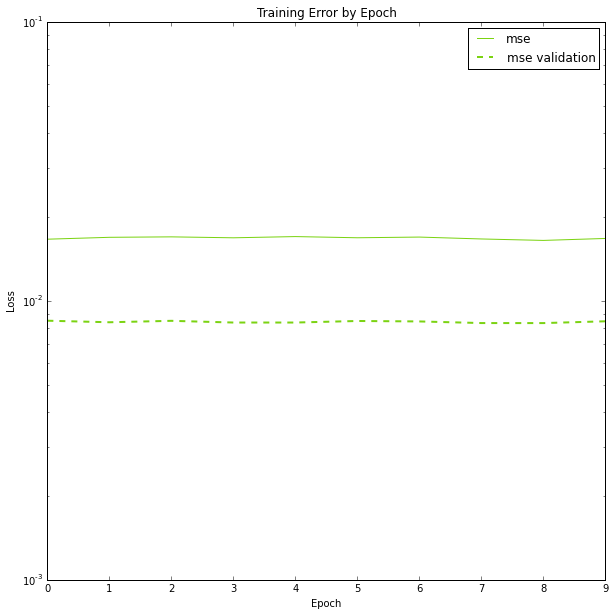

41
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0166 - val_loss: 0.0086
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0175 - val_loss: 0.0087
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0167 - val_loss: 0.0086
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0167 - val_loss: 0.0085
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0164 - val_loss: 0.0086
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0163 - val_loss: 0.0085
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0161 - val_loss: 0.0086
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0165 - val_loss: 0.0086
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0161 - val_loss: 0.0085
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0165 - val_loss: 0.0083


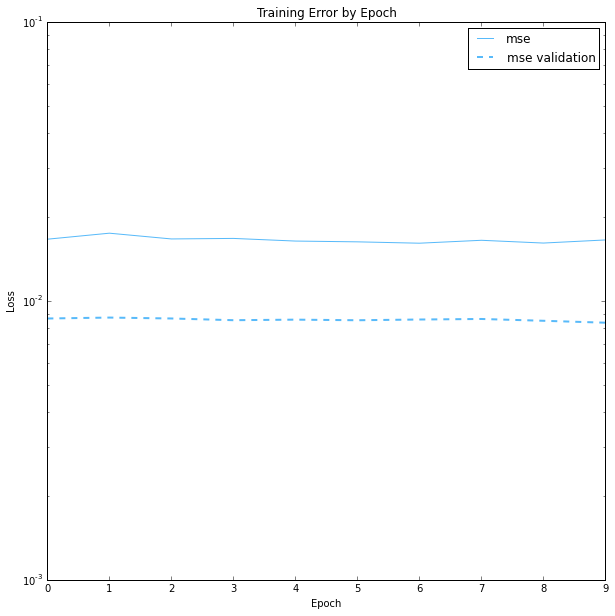

42
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0167 - val_loss: 0.0080
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0170 - val_loss: 0.0081
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0172 - val_loss: 0.0081
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0170 - val_loss: 0.0081
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0171 - val_loss: 0.0081
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0172 - val_loss: 0.0080
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0173 - val_loss: 0.0079
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0168 - val_loss: 0.0080
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0164 - val_loss: 0.0079
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0165 - val_loss: 0.0079


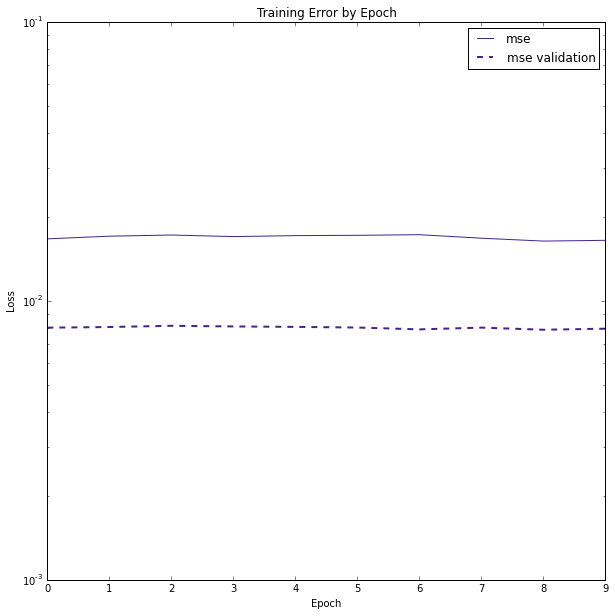

43
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0150 - val_loss: 0.0069
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0149 - val_loss: 0.0067
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0148 - val_loss: 0.0067
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0147 - val_loss: 0.0067
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0150 - val_loss: 0.0067
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0149 - val_loss: 0.0066
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0146 - val_loss: 0.0066
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0146 - val_loss: 0.0065
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0147 - val_loss: 0.0066
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0147 - val_loss: 0.0065


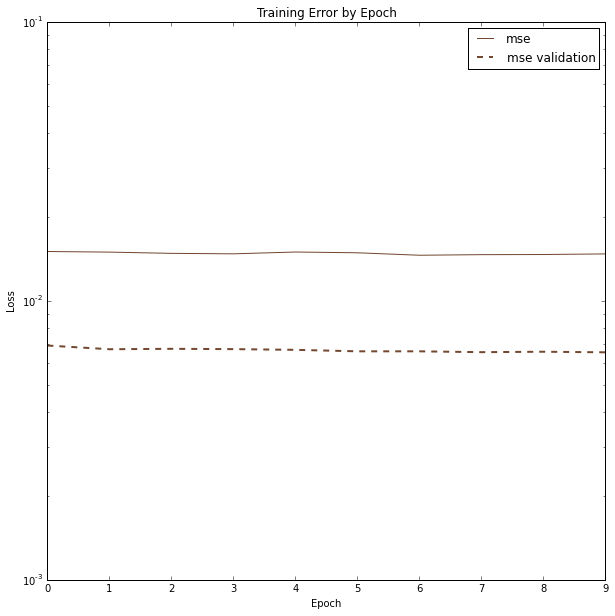

44
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0156 - val_loss: 0.0068
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0158 - val_loss: 0.0069
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0157 - val_loss: 0.0069
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0155 - val_loss: 0.0070
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0149 - val_loss: 0.0069
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0154 - val_loss: 0.0068
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0153 - val_loss: 0.0068
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0160 - val_loss: 0.0069
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0153 - val_loss: 0.0069
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0155 - val_loss: 0.0069


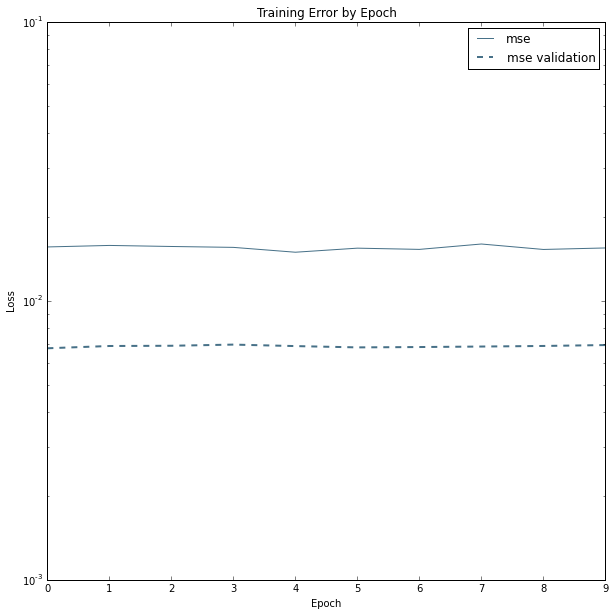

45
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0157 - val_loss: 0.0067
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0154 - val_loss: 0.0066
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0153 - val_loss: 0.0065
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0151 - val_loss: 0.0067
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0155 - val_loss: 0.0065
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0151 - val_loss: 0.0066
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0154 - val_loss: 0.0065
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0152 - val_loss: 0.0066
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0154 - val_loss: 0.0065
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0155 - val_loss: 0.0065


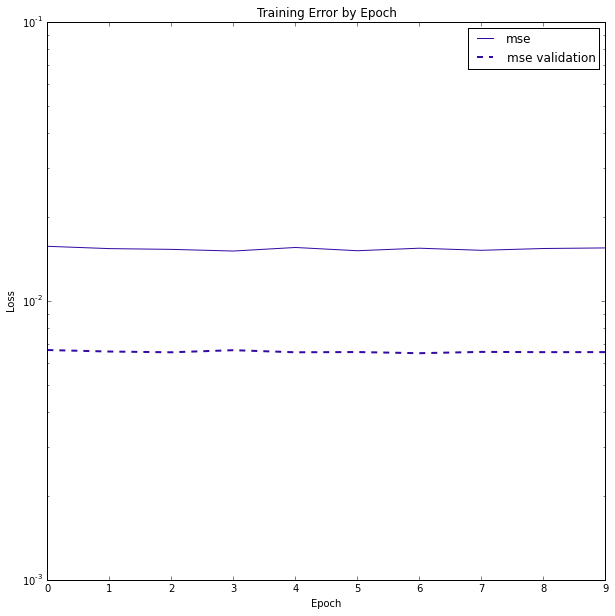

46
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0140 - val_loss: 0.0071
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0140 - val_loss: 0.0070
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0141 - val_loss: 0.0070
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0135 - val_loss: 0.0069
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0142 - val_loss: 0.0070
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0132 - val_loss: 0.0069
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0135 - val_loss: 0.0069
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0132 - val_loss: 0.0069
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0135 - val_loss: 0.0069
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0137 - val_loss: 0.0069


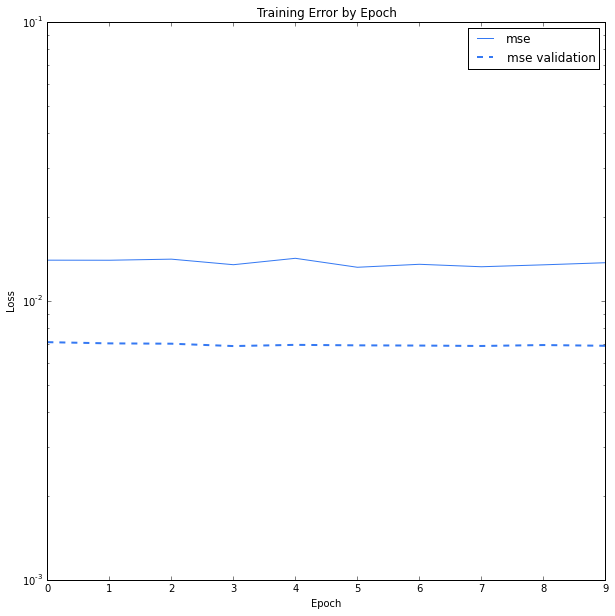

47
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0147 - val_loss: 0.0068
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0147 - val_loss: 0.0068
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0148 - val_loss: 0.0069
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0146 - val_loss: 0.0068
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0146 - val_loss: 0.0068
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0150 - val_loss: 0.0068
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0146 - val_loss: 0.0068
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0140 - val_loss: 0.0068
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0146 - val_loss: 0.0067
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0142 - val_loss: 0.0067


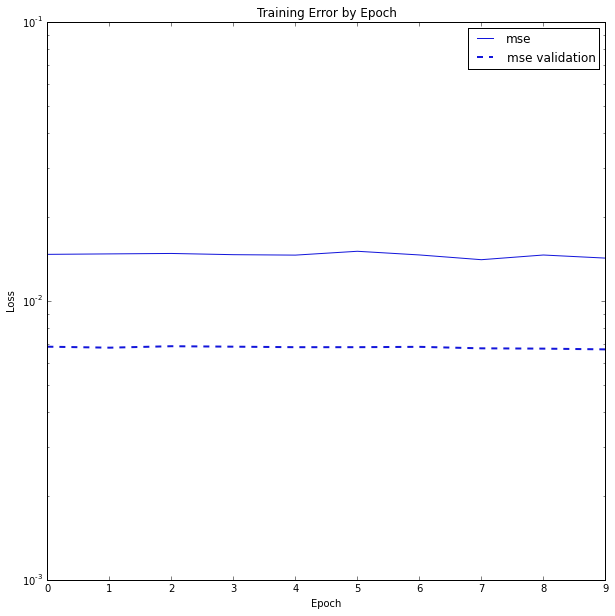

48
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0140 - val_loss: 0.0057
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0141 - val_loss: 0.0057
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0138 - val_loss: 0.0057
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0141 - val_loss: 0.0057
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0137 - val_loss: 0.0057
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0141 - val_loss: 0.0057
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0142 - val_loss: 0.0057
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0140 - val_loss: 0.0057
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0136 - val_loss: 0.0056
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0141 - val_loss: 0.0056


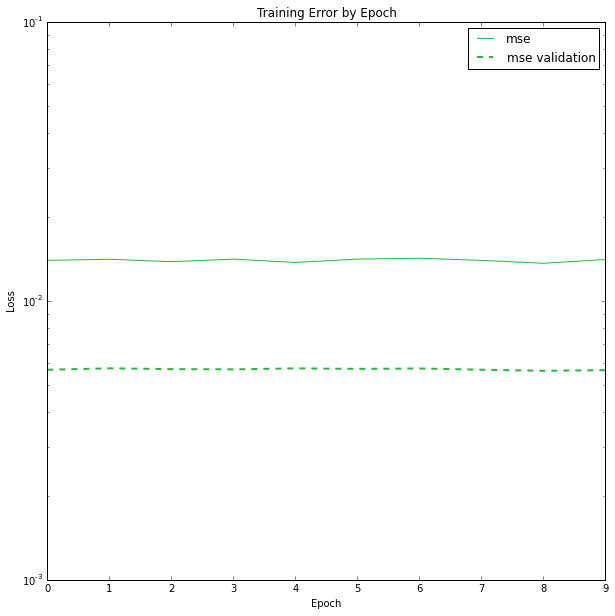

49
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0141 - val_loss: 0.0063
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0143 - val_loss: 0.0063
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0142 - val_loss: 0.0062
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0143 - val_loss: 0.0063
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0143 - val_loss: 0.0063
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0142 - val_loss: 0.0062
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0142 - val_loss: 0.0063
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0141 - val_loss: 0.0062
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0140 - val_loss: 0.0062
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0143 - val_loss: 0.0061


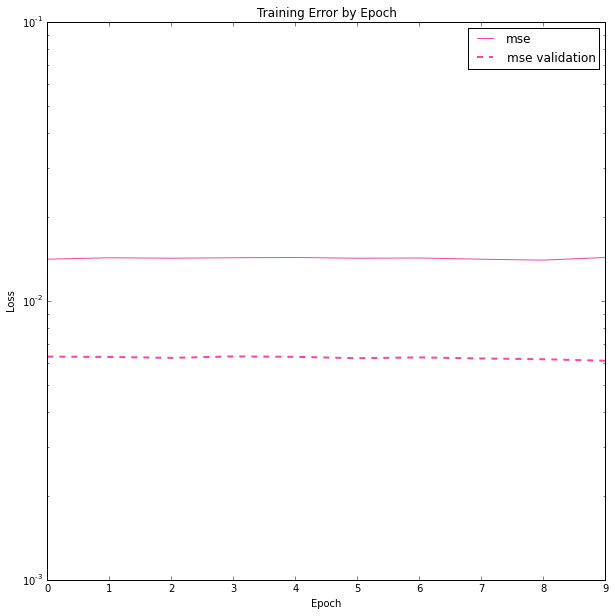

50
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0130 - val_loss: 0.0061
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0131 - val_loss: 0.0061
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0134 - val_loss: 0.0060
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0130 - val_loss: 0.0060
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0129 - val_loss: 0.0059
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0127 - val_loss: 0.0059
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0130 - val_loss: 0.0059
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0125 - val_loss: 0.0058
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0131 - val_loss: 0.0058
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0125 - val_loss: 0.0057


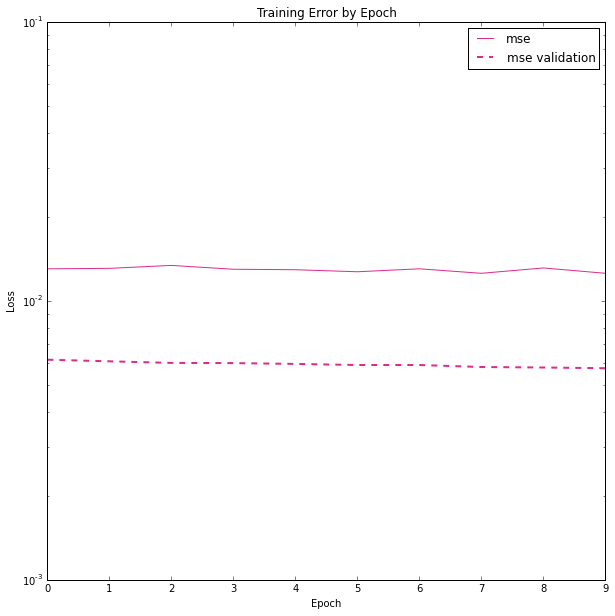

51
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0146 - val_loss: 0.0065
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0142 - val_loss: 0.0066
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0143 - val_loss: 0.0066
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0145 - val_loss: 0.0066
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0140 - val_loss: 0.0066
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0141 - val_loss: 0.0067
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0142 - val_loss: 0.0066
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0141 - val_loss: 0.0066
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0141 - val_loss: 0.0066
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0138 - val_loss: 0.0065


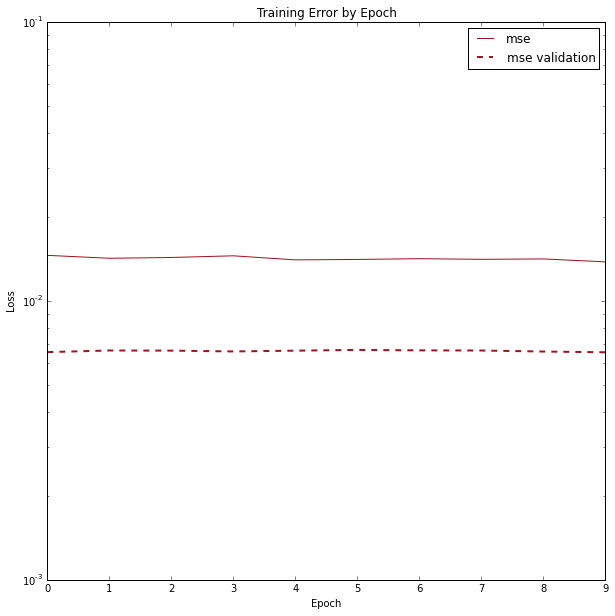

52
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0136 - val_loss: 0.0055
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0134 - val_loss: 0.0055
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0140 - val_loss: 0.0055
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0137 - val_loss: 0.0055
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0135 - val_loss: 0.0054
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0139 - val_loss: 0.0054
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0135 - val_loss: 0.0054
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0134 - val_loss: 0.0053
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0135 - val_loss: 0.0054
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0136 - val_loss: 0.0053


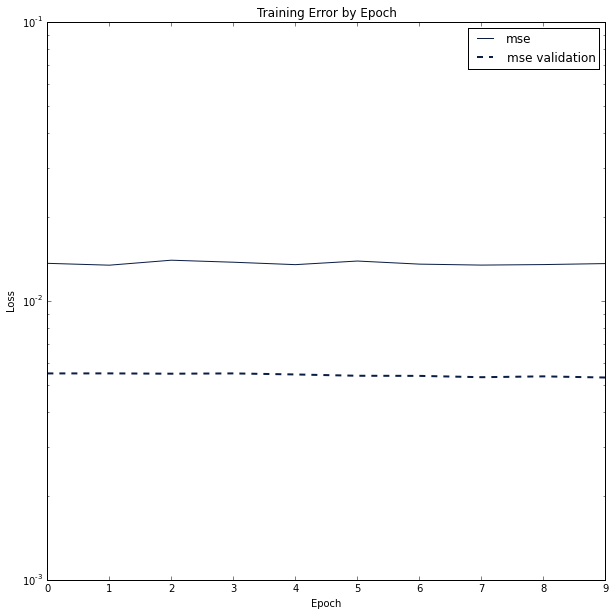

53
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0136 - val_loss: 0.0068
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0136 - val_loss: 0.0069
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0137 - val_loss: 0.0069
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0134 - val_loss: 0.0069
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0135 - val_loss: 0.0069
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0135 - val_loss: 0.0069
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0134 - val_loss: 0.0069
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0134 - val_loss: 0.0068
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0135 - val_loss: 0.0069
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0134 - val_loss: 0.0069


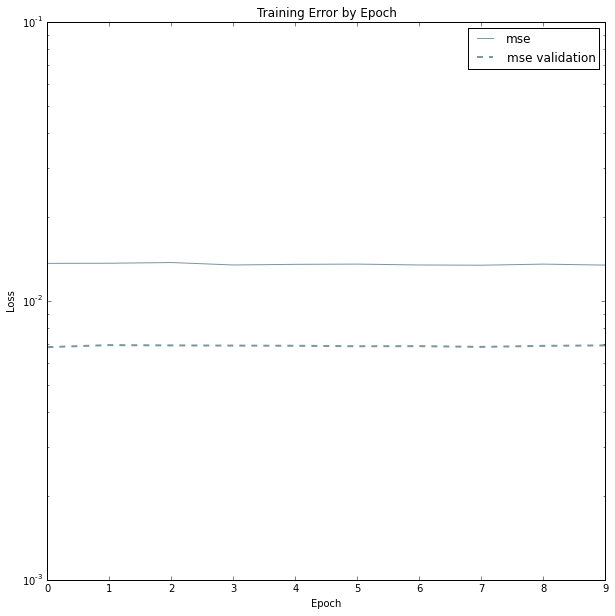

54
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0130 - val_loss: 0.0066
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0133 - val_loss: 0.0065
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0127 - val_loss: 0.0064
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0132 - val_loss: 0.0064
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0130 - val_loss: 0.0064
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0129 - val_loss: 0.0064
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0126 - val_loss: 0.0064
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0129 - val_loss: 0.0064
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0130 - val_loss: 0.0064
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0134 - val_loss: 0.0063


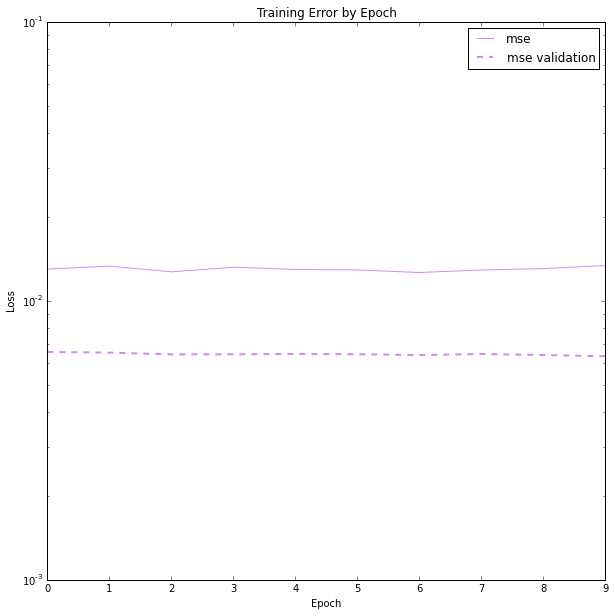

55
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0127 - val_loss: 0.0060
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0135 - val_loss: 0.0061
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0129 - val_loss: 0.0061
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0129 - val_loss: 0.0060
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0129 - val_loss: 0.0061
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0128 - val_loss: 0.0061
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0126 - val_loss: 0.0060
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0130 - val_loss: 0.0060
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0129 - val_loss: 0.0060
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0129 - val_loss: 0.0060


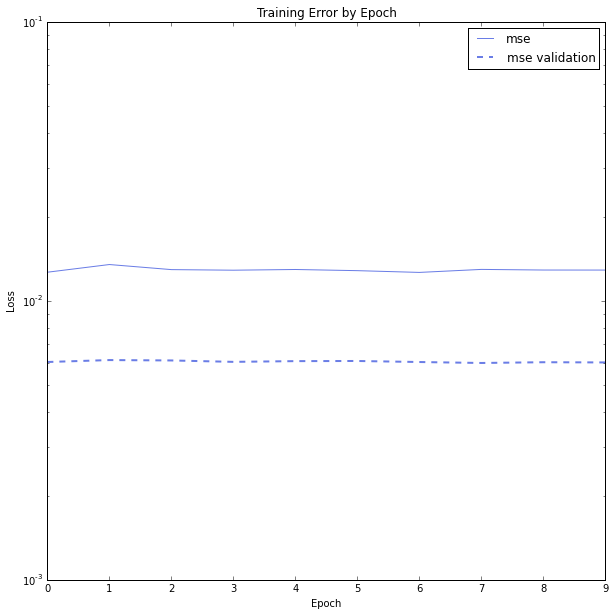

56
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0136 - val_loss: 0.0055
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0134 - val_loss: 0.0055
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0136 - val_loss: 0.0057
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0137 - val_loss: 0.0055
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0133 - val_loss: 0.0055
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0132 - val_loss: 0.0056
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0137 - val_loss: 0.0055
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0131 - val_loss: 0.0056
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0135 - val_loss: 0.0055
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0134 - val_loss: 0.0054


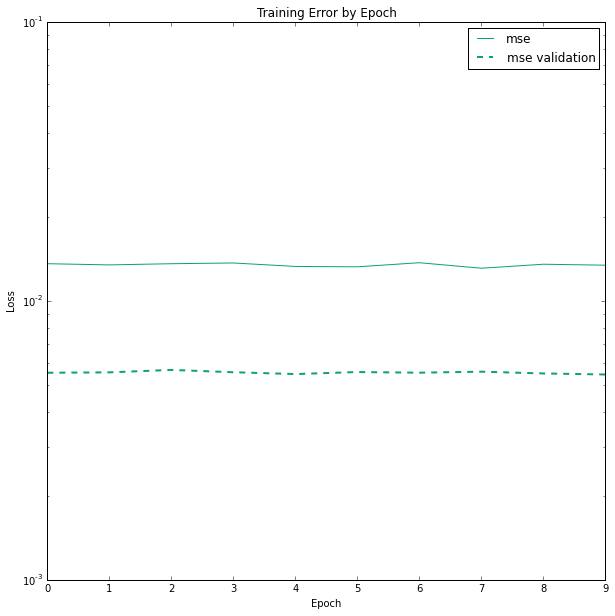

57
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0129 - val_loss: 0.0056
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0132 - val_loss: 0.0056
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0128 - val_loss: 0.0056
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0133 - val_loss: 0.0056
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0129 - val_loss: 0.0056
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0128 - val_loss: 0.0055
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0131 - val_loss: 0.0055
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0129 - val_loss: 0.0055
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0128 - val_loss: 0.0055
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0131 - val_loss: 0.0055


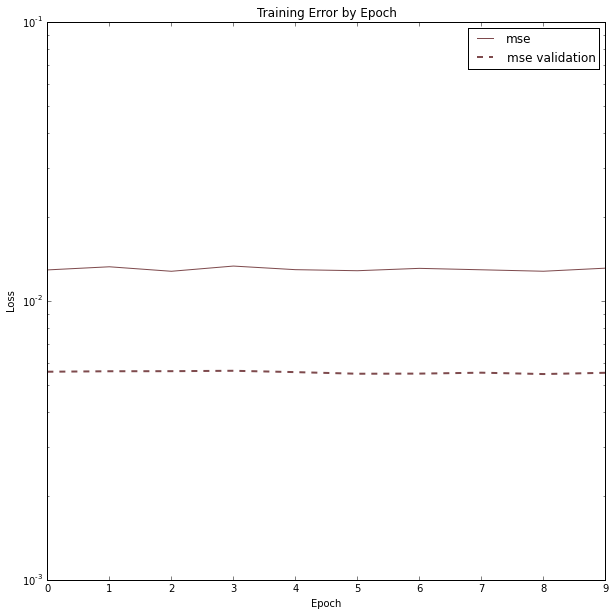

58
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0120 - val_loss: 0.0056
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0117 - val_loss: 0.0055
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0119 - val_loss: 0.0054
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0120 - val_loss: 0.0054
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0117 - val_loss: 0.0054
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0119 - val_loss: 0.0054
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0118 - val_loss: 0.0054
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0117 - val_loss: 0.0054
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0119 - val_loss: 0.0055
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0116 - val_loss: 0.0053


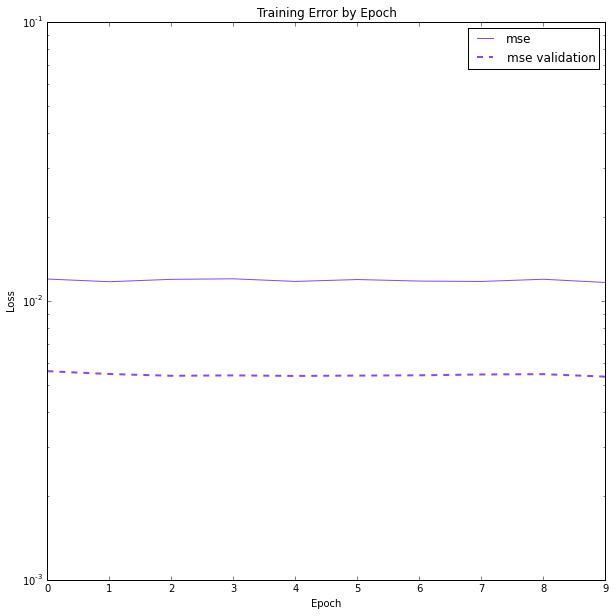

59
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0113 - val_loss: 0.0051
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0111 - val_loss: 0.0051
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0115 - val_loss: 0.0051
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0114 - val_loss: 0.0051
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0117 - val_loss: 0.0052
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0112 - val_loss: 0.0050
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0112 - val_loss: 0.0050
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0111 - val_loss: 0.0050
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0111 - val_loss: 0.0050
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0113 - val_loss: 0.0050


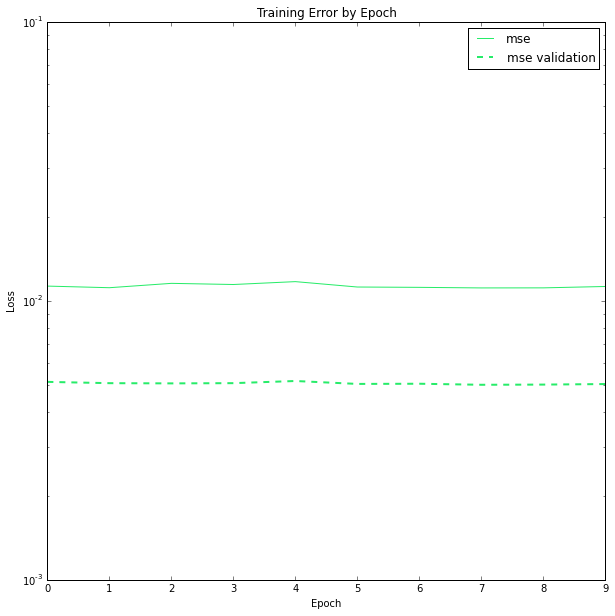

60
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0139 - val_loss: 0.0059
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0137 - val_loss: 0.0060
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0133 - val_loss: 0.0061
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0140 - val_loss: 0.0061
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0134 - val_loss: 0.0061
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0134 - val_loss: 0.0061
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0138 - val_loss: 0.0061
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0131 - val_loss: 0.0059
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0135 - val_loss: 0.0060
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0136 - val_loss: 0.0060


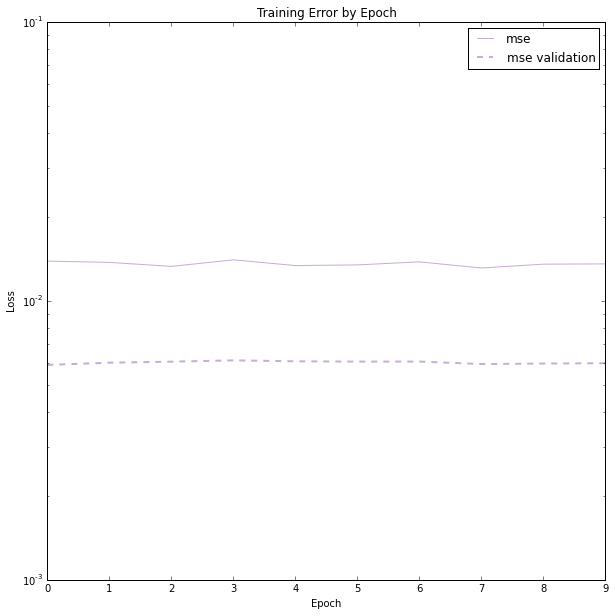

61
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0122 - val_loss: 0.0060
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0120 - val_loss: 0.0058
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0122 - val_loss: 0.0058
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0122 - val_loss: 0.0058
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0125 - val_loss: 0.0057
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0123 - val_loss: 0.0058
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0124 - val_loss: 0.0058
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0118 - val_loss: 0.0057
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0123 - val_loss: 0.0057
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0117 - val_loss: 0.0056


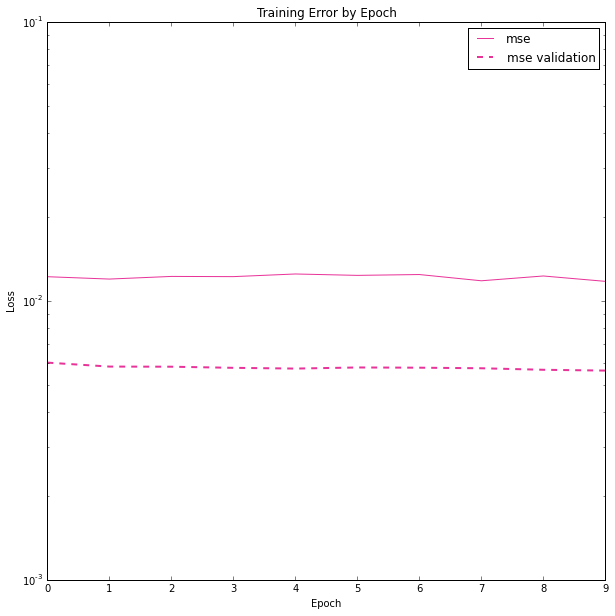

62
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0133 - val_loss: 0.0054
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0131 - val_loss: 0.0055
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0131 - val_loss: 0.0055
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0131 - val_loss: 0.0055
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0130 - val_loss: 0.0054
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0129 - val_loss: 0.0054
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0132 - val_loss: 0.0054
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0129 - val_loss: 0.0054
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0131 - val_loss: 0.0054
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0131 - val_loss: 0.0054


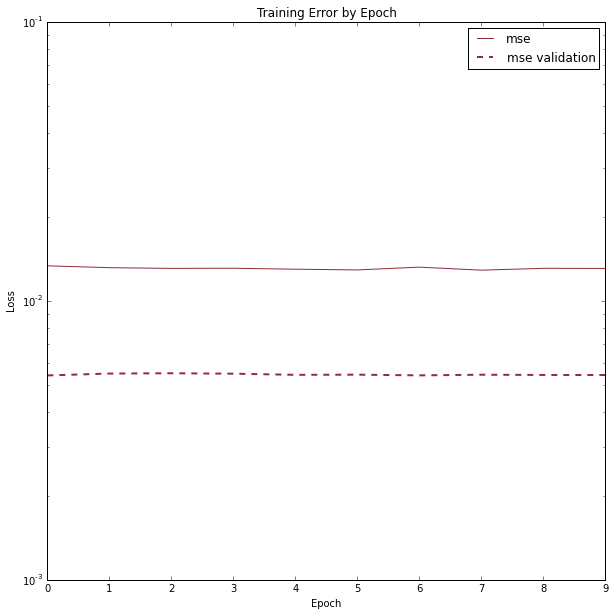

63
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0116 - val_loss: 0.0045
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0113 - val_loss: 0.0044
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0115 - val_loss: 0.0043
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0116 - val_loss: 0.0043
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0113 - val_loss: 0.0043
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0116 - val_loss: 0.0043
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0112 - val_loss: 0.0043
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0112 - val_loss: 0.0042
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0113 - val_loss: 0.0042
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0116 - val_loss: 0.0041


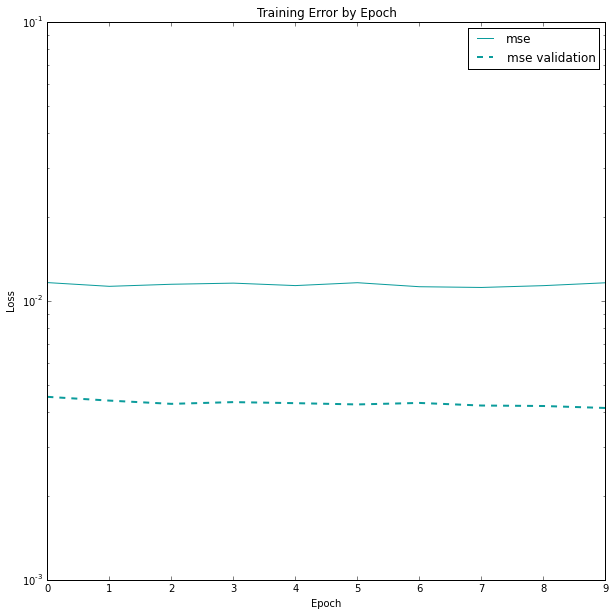

64
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0121 - val_loss: 0.0053
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0121 - val_loss: 0.0053
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0120 - val_loss: 0.0054
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0121 - val_loss: 0.0053
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0118 - val_loss: 0.0053
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0120 - val_loss: 0.0053
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0118 - val_loss: 0.0052
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0120 - val_loss: 0.0052
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0119 - val_loss: 0.0053
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0120 - val_loss: 0.0052


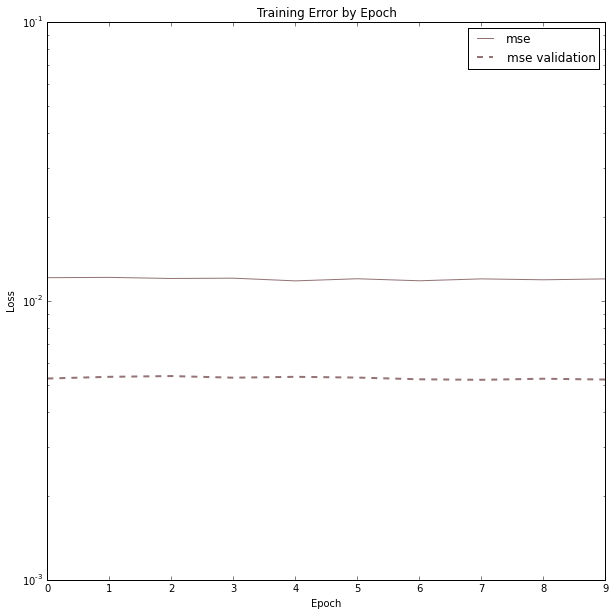

65
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0122 - val_loss: 0.0050
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0122 - val_loss: 0.0050
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0121 - val_loss: 0.0050
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0120 - val_loss: 0.0050
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0119 - val_loss: 0.0050
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0120 - val_loss: 0.0051
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0121 - val_loss: 0.0051
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0117 - val_loss: 0.0050
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0119 - val_loss: 0.0050
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0116 - val_loss: 0.0050


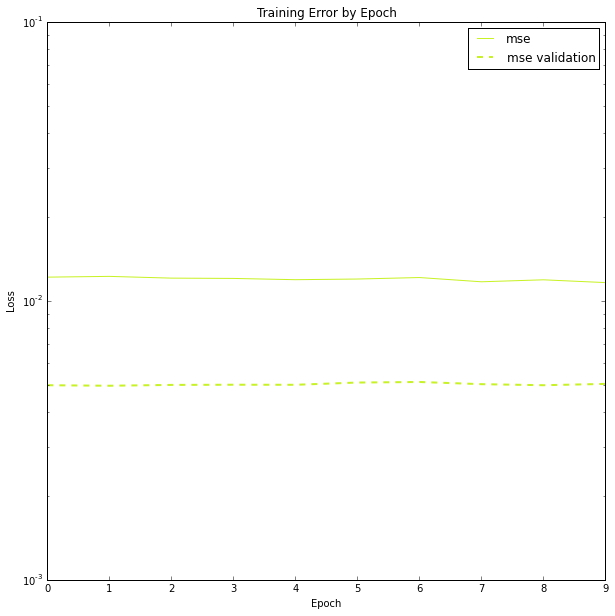

66
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0116 - val_loss: 0.0047
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0110 - val_loss: 0.0046
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0112 - val_loss: 0.0045
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0111 - val_loss: 0.0045
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0113 - val_loss: 0.0044
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0111 - val_loss: 0.0044
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0113 - val_loss: 0.0044
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0114 - val_loss: 0.0044
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0111 - val_loss: 0.0044
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0112 - val_loss: 0.0043


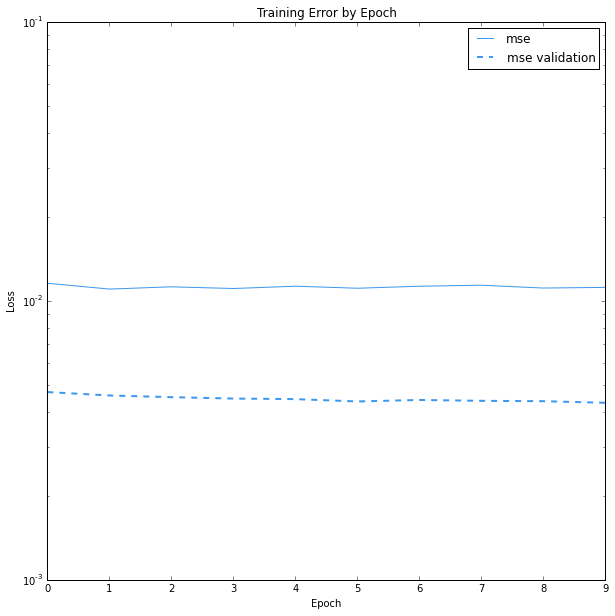

67
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0121 - val_loss: 0.0056
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0124 - val_loss: 0.0056
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0126 - val_loss: 0.0057
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0123 - val_loss: 0.0056
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0123 - val_loss: 0.0056
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0126 - val_loss: 0.0056
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0123 - val_loss: 0.0056
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0121 - val_loss: 0.0055
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0125 - val_loss: 0.0056
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0123 - val_loss: 0.0056


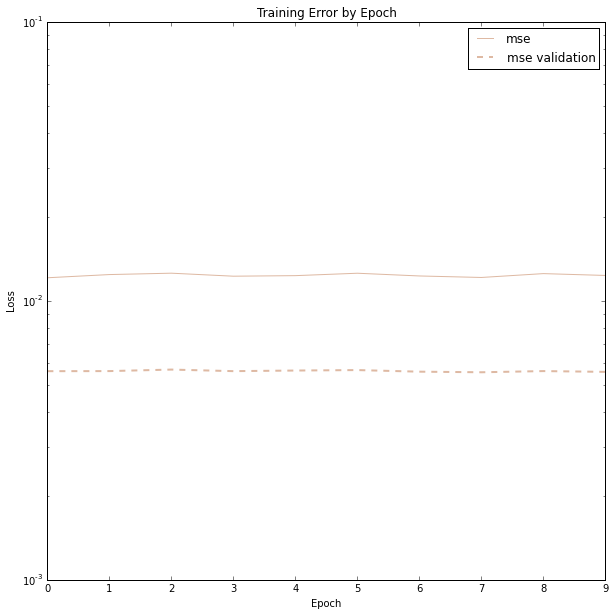

68
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0114 - val_loss: 0.0044
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0108 - val_loss: 0.0043
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0109 - val_loss: 0.0042
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0110 - val_loss: 0.0042
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0113 - val_loss: 0.0043
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0108 - val_loss: 0.0043
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0110 - val_loss: 0.0042
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0111 - val_loss: 0.0042
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0109 - val_loss: 0.0042
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0109 - val_loss: 0.0042


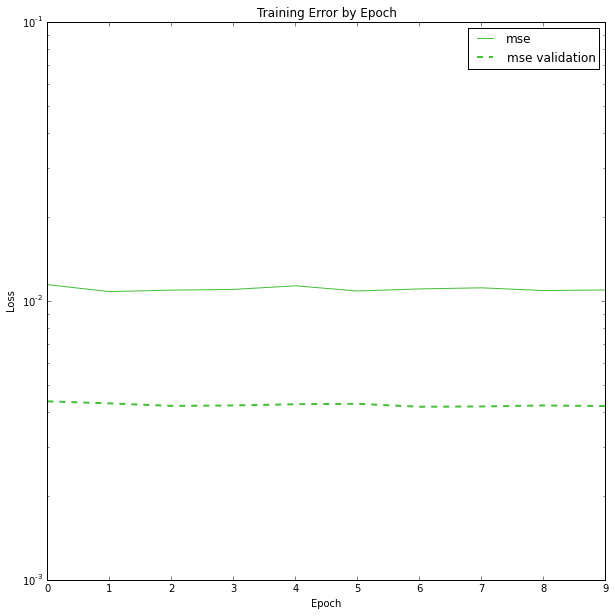

69
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0117 - val_loss: 0.0046
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0115 - val_loss: 0.0047
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0114 - val_loss: 0.0047
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0116 - val_loss: 0.0048
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0111 - val_loss: 0.0047
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0111 - val_loss: 0.0046
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0116 - val_loss: 0.0046
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0112 - val_loss: 0.0047
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0114 - val_loss: 0.0046
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0115 - val_loss: 0.0046


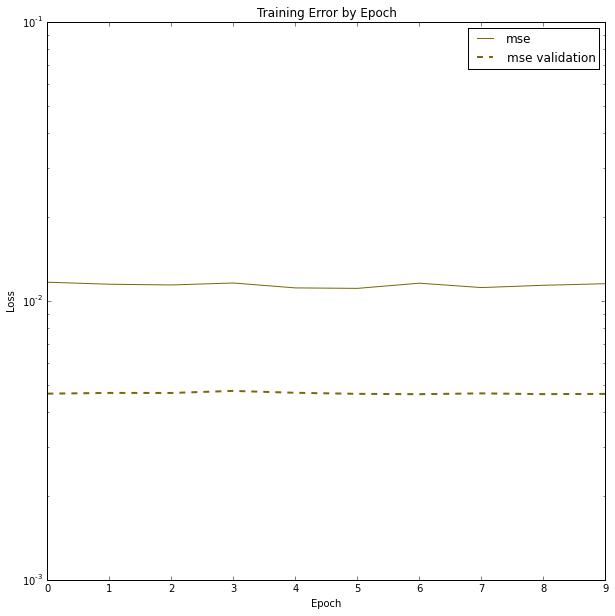

70
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0107 - val_loss: 0.0042
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0107 - val_loss: 0.0042
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0105 - val_loss: 0.0041
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0105 - val_loss: 0.0041
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0104 - val_loss: 0.0041
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0104 - val_loss: 0.0041
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0105 - val_loss: 0.0042
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0109 - val_loss: 0.0041
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0105 - val_loss: 0.0042
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0104 - val_loss: 0.0041


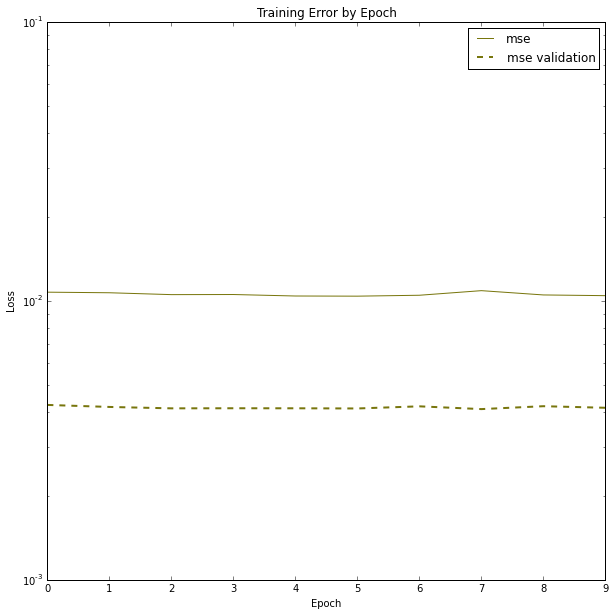

71
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0118 - val_loss: 0.0050
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0115 - val_loss: 0.0050
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0118 - val_loss: 0.0050
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0117 - val_loss: 0.0050
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0116 - val_loss: 0.0050
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0119 - val_loss: 0.0050
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0117 - val_loss: 0.0050
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0119 - val_loss: 0.0050
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0114 - val_loss: 0.0049
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0116 - val_loss: 0.0049


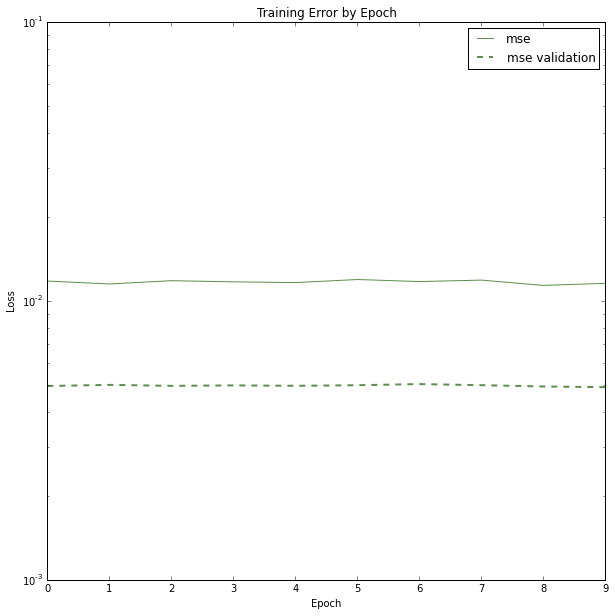

72
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0114 - val_loss: 0.0046
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0114 - val_loss: 0.0046
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0114 - val_loss: 0.0045
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0109 - val_loss: 0.0045
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0116 - val_loss: 0.0045
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0113 - val_loss: 0.0043
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0115 - val_loss: 0.0044
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0108 - val_loss: 0.0044
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0114 - val_loss: 0.0044
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0114 - val_loss: 0.0043


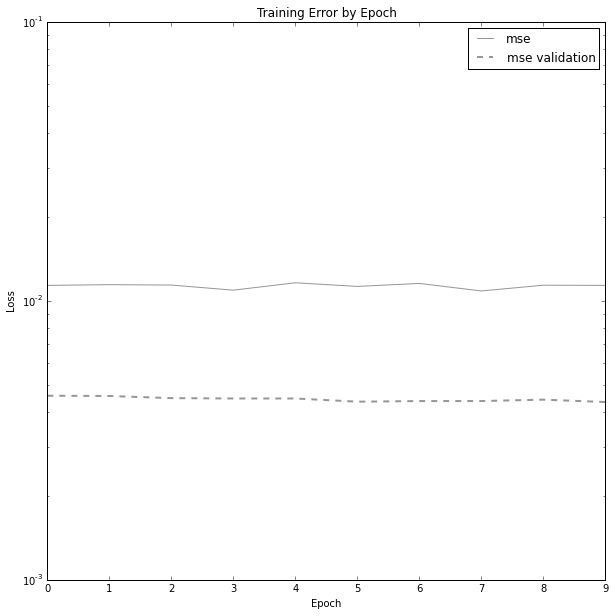

73
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0114 - val_loss: 0.0044
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0114 - val_loss: 0.0045
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0114 - val_loss: 0.0044
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0113 - val_loss: 0.0044
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0112 - val_loss: 0.0045
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0111 - val_loss: 0.0045
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0106 - val_loss: 0.0044
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0109 - val_loss: 0.0045
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0113 - val_loss: 0.0044
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0107 - val_loss: 0.0044


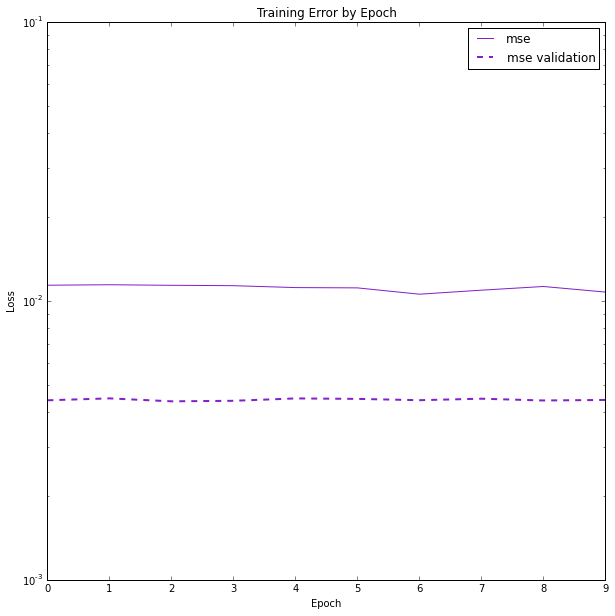

74
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0103 - val_loss: 0.0040
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0102 - val_loss: 0.0040
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0040
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0104 - val_loss: 0.0040
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0040
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0103 - val_loss: 0.0040
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0102 - val_loss: 0.0038
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0103 - val_loss: 0.0039
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0103 - val_loss: 0.0039
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0039


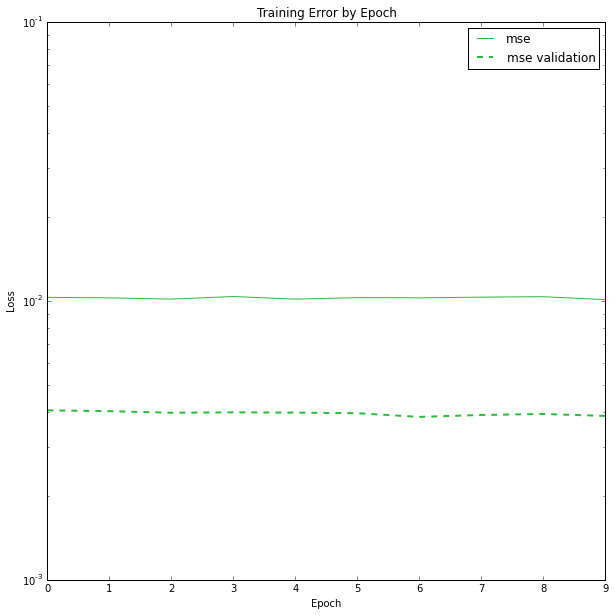

75
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0112 - val_loss: 0.0039
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0107 - val_loss: 0.0039
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0108 - val_loss: 0.0040
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0111 - val_loss: 0.0040
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0109 - val_loss: 0.0040
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0110 - val_loss: 0.0040
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0109 - val_loss: 0.0040
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0109 - val_loss: 0.0039
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0110 - val_loss: 0.0040
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0106 - val_loss: 0.0039


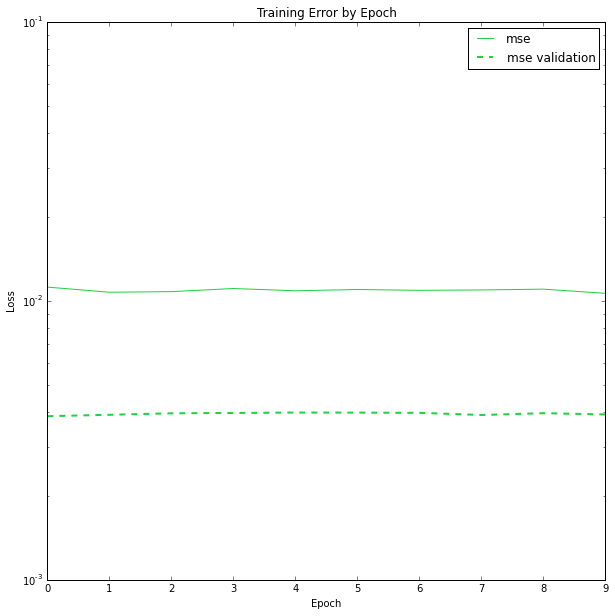

76
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0119 - val_loss: 0.0047
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0116 - val_loss: 0.0047
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0118 - val_loss: 0.0047
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0115 - val_loss: 0.0047
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0114 - val_loss: 0.0048
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0112 - val_loss: 0.0047
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0113 - val_loss: 0.0048
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0115 - val_loss: 0.0047
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0110 - val_loss: 0.0047
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0117 - val_loss: 0.0047


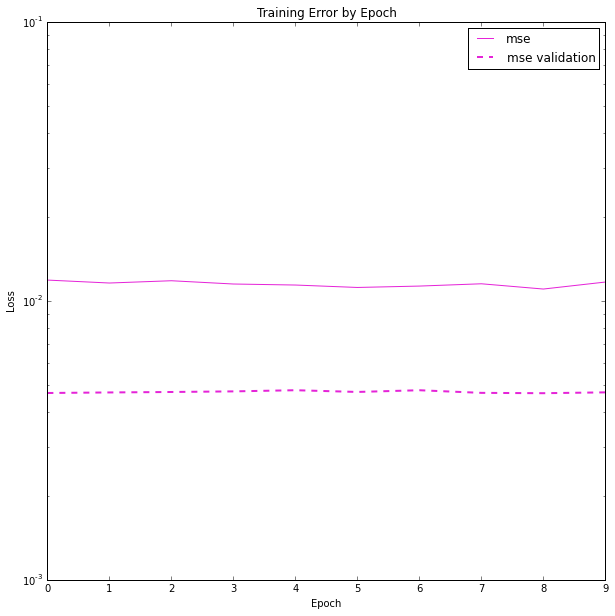

77
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0099 - val_loss: 0.0039
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0098 - val_loss: 0.0038
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0100 - val_loss: 0.0039
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0100 - val_loss: 0.0038
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0100 - val_loss: 0.0038
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0098 - val_loss: 0.0038
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0096 - val_loss: 0.0038
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0098 - val_loss: 0.0038
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0097 - val_loss: 0.0038
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0096 - val_loss: 0.0037


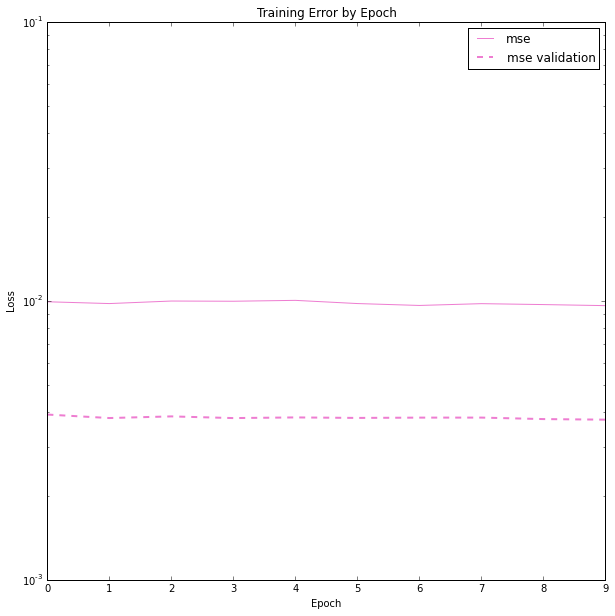

78
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0100 - val_loss: 0.0042
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0100 - val_loss: 0.0042
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0042
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0104 - val_loss: 0.0042
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0102 - val_loss: 0.0042
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0042
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0102 - val_loss: 0.0042
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0099 - val_loss: 0.0042
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0098 - val_loss: 0.0041
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0100 - val_loss: 0.0041


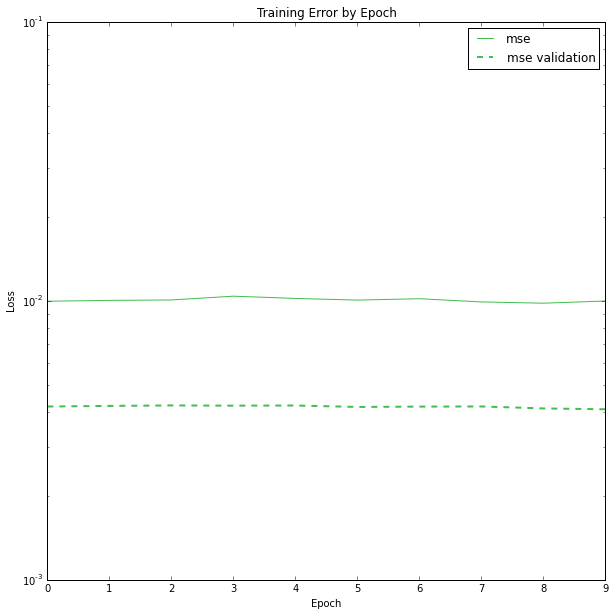

79
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0102 - val_loss: 0.0044
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0044
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0103 - val_loss: 0.0044
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0103 - val_loss: 0.0044
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0100 - val_loss: 0.0044
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0102 - val_loss: 0.0044
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0044
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0044
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0044
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0097 - val_loss: 0.0044


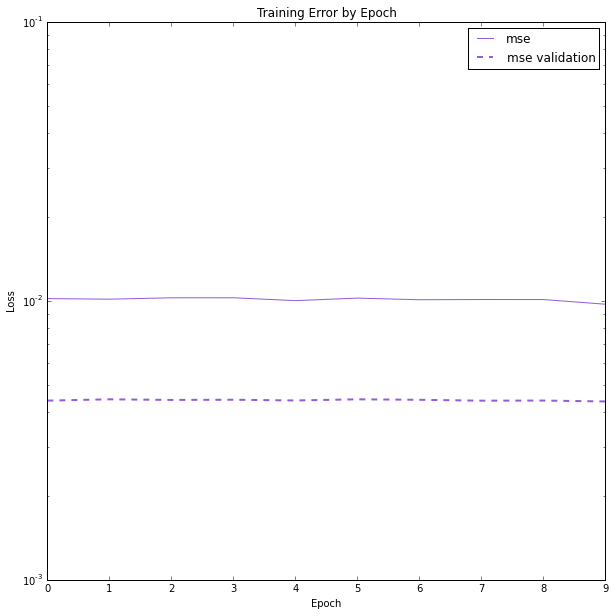

80
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0105 - val_loss: 0.0040
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0040
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0103 - val_loss: 0.0040
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0103 - val_loss: 0.0040
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0102 - val_loss: 0.0040
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0102 - val_loss: 0.0040
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0103 - val_loss: 0.0039
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0039
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0104 - val_loss: 0.0039
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0039


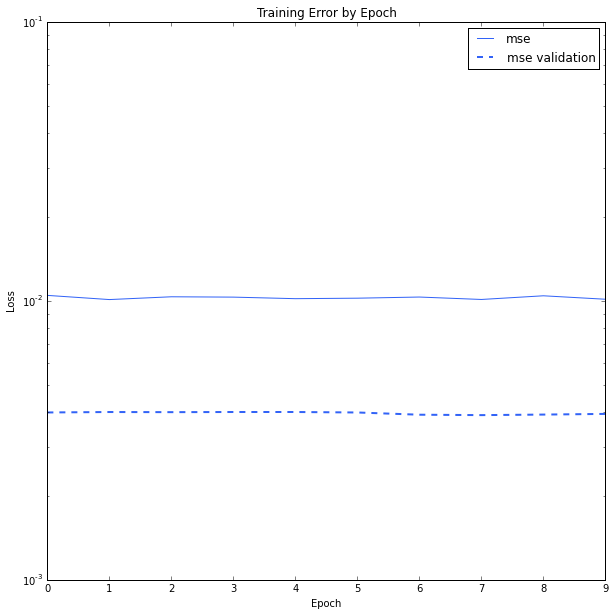

81
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0097 - val_loss: 0.0038
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0037
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0095 - val_loss: 0.0037
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0037
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0095 - val_loss: 0.0037
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0037
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0095 - val_loss: 0.0037
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0037
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0093 - val_loss: 0.0038
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0092 - val_loss: 0.0037


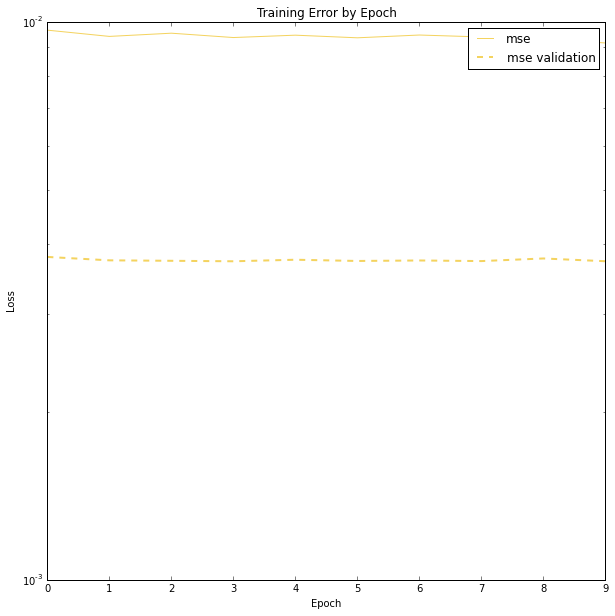

82
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0098 - val_loss: 0.0035
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0097 - val_loss: 0.0035
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0095 - val_loss: 0.0035
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0098 - val_loss: 0.0034
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0097 - val_loss: 0.0035
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0095 - val_loss: 0.0035
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0093 - val_loss: 0.0034
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0093 - val_loss: 0.0034
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0096 - val_loss: 0.0034
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0096 - val_loss: 0.0034


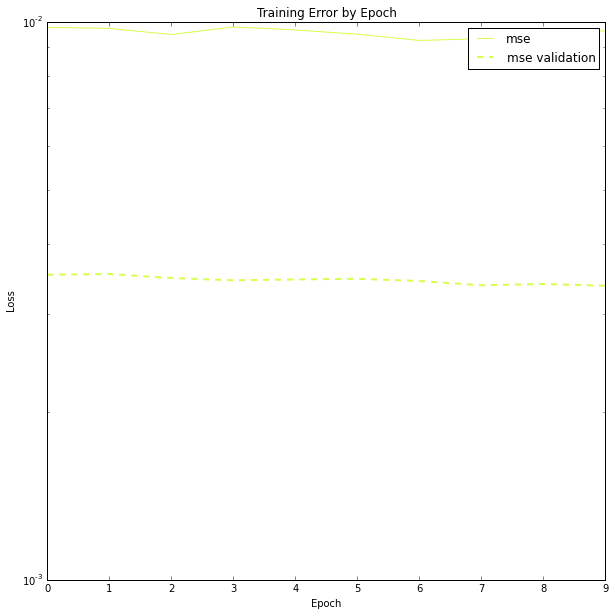

83
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0099 - val_loss: 0.0041
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0098 - val_loss: 0.0041
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0098 - val_loss: 0.0041
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0041
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0041
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0097 - val_loss: 0.0041
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0098 - val_loss: 0.0041
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0097 - val_loss: 0.0041
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0097 - val_loss: 0.0041
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0098 - val_loss: 0.0041


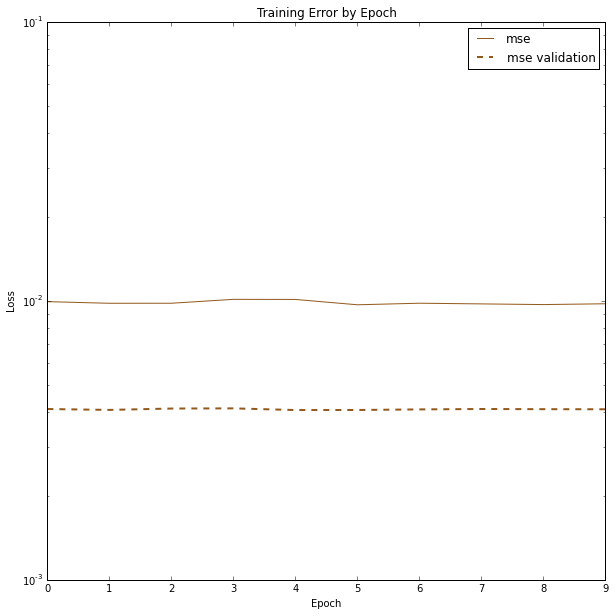

84
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0098 - val_loss: 0.0033
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0097 - val_loss: 0.0034
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0099 - val_loss: 0.0033
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0098 - val_loss: 0.0033
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0098 - val_loss: 0.0033
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0095 - val_loss: 0.0033
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0095 - val_loss: 0.0033
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0095 - val_loss: 0.0033
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0098 - val_loss: 0.0033
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0033


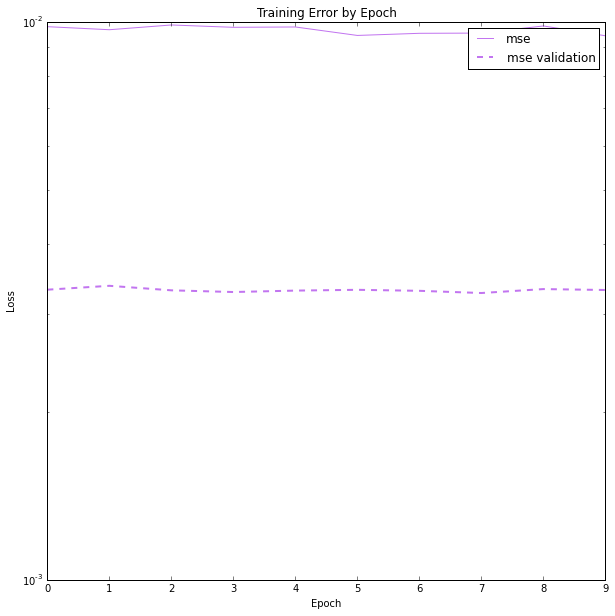

85
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0097 - val_loss: 0.0036
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0099 - val_loss: 0.0036
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0098 - val_loss: 0.0035
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0035
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0097 - val_loss: 0.0035
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0095 - val_loss: 0.0035
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0097 - val_loss: 0.0034
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0096 - val_loss: 0.0035
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0099 - val_loss: 0.0034
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0095 - val_loss: 0.0035


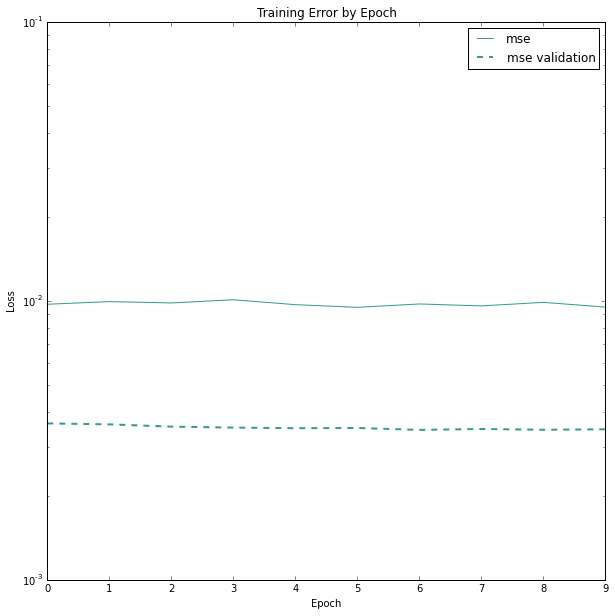

86
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0036
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0100 - val_loss: 0.0036
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0036
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0100 - val_loss: 0.0036
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0102 - val_loss: 0.0036
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0100 - val_loss: 0.0036
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0103 - val_loss: 0.0036
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0036
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0103 - val_loss: 0.0036
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0036


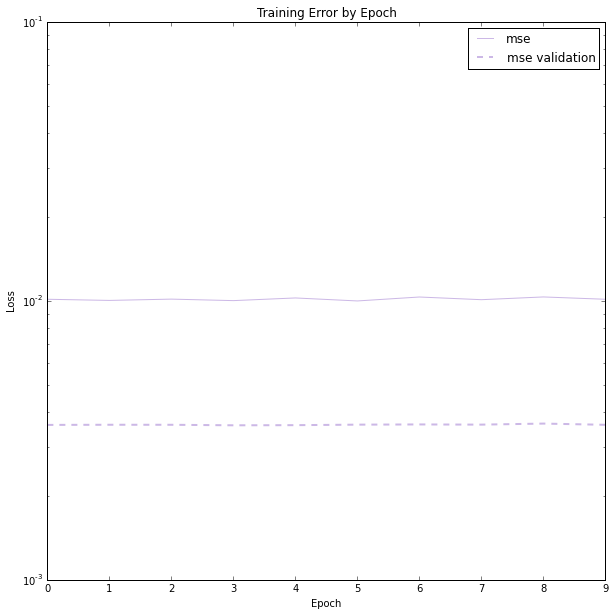

87
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0093 - val_loss: 0.0033
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0090 - val_loss: 0.0033
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0090 - val_loss: 0.0033
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0091 - val_loss: 0.0033
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0088 - val_loss: 0.0033
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0089 - val_loss: 0.0033
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0091 - val_loss: 0.0033
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0092 - val_loss: 0.0033
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0088 - val_loss: 0.0033
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0089 - val_loss: 0.0034


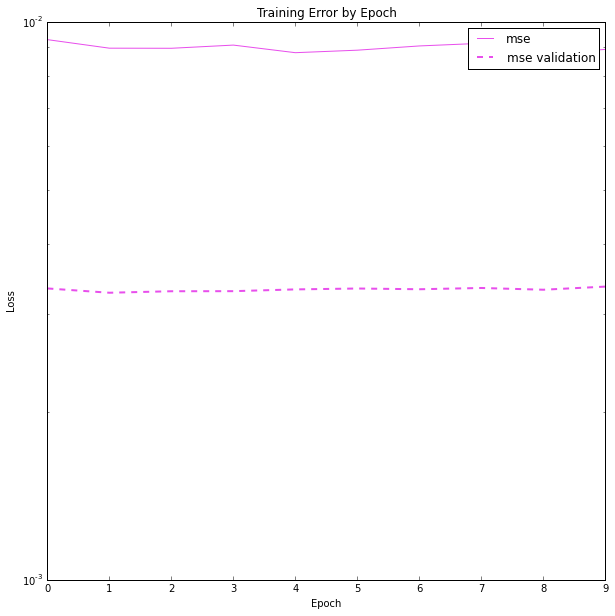

88
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0034
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0098 - val_loss: 0.0034
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0103 - val_loss: 0.0034
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0098 - val_loss: 0.0035
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0101 - val_loss: 0.0035
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0097 - val_loss: 0.0035
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0100 - val_loss: 0.0034
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0098 - val_loss: 0.0034
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0099 - val_loss: 0.0034
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0097 - val_loss: 0.0034


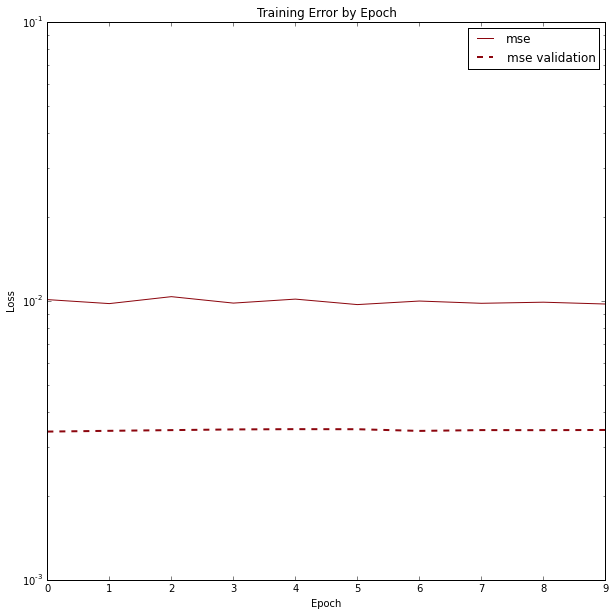

89
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0093 - val_loss: 0.0036
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0036
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0095 - val_loss: 0.0036
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0091 - val_loss: 0.0035
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0091 - val_loss: 0.0036
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0091 - val_loss: 0.0035
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0092 - val_loss: 0.0036
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0093 - val_loss: 0.0035
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0095 - val_loss: 0.0036
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0092 - val_loss: 0.0035


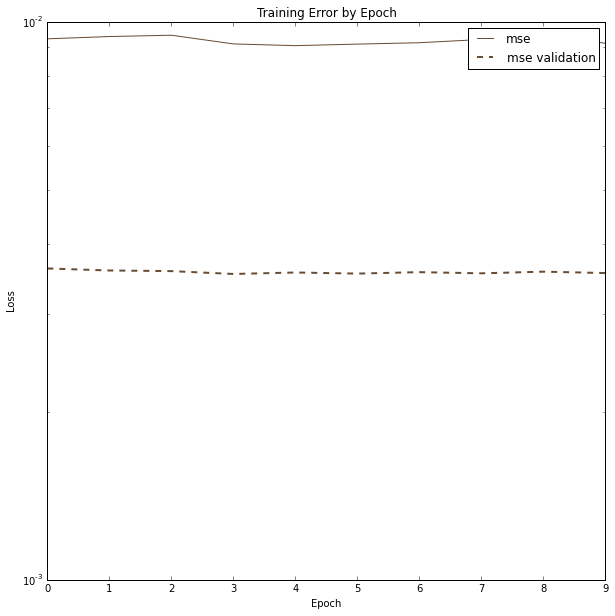

90
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0091 - val_loss: 0.0034
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0095 - val_loss: 0.0034
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0090 - val_loss: 0.0035
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0091 - val_loss: 0.0035
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0092 - val_loss: 0.0034
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0092 - val_loss: 0.0035
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0091 - val_loss: 0.0035
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0092 - val_loss: 0.0035
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0089 - val_loss: 0.0035
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0091 - val_loss: 0.0035


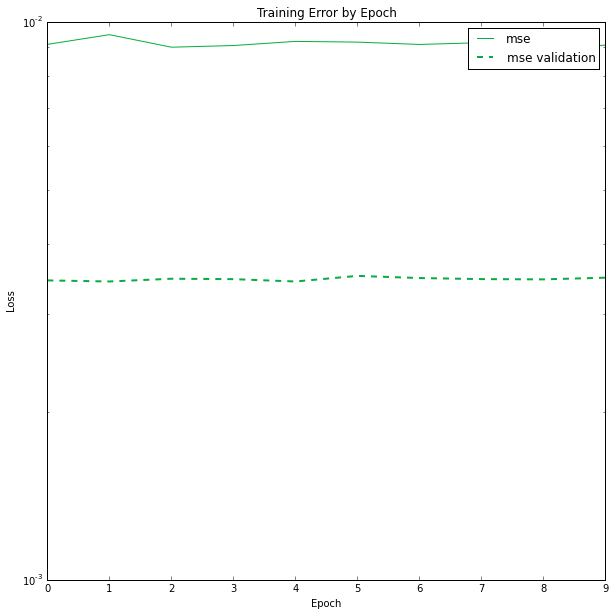

91
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0093 - val_loss: 0.0032
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0095 - val_loss: 0.0033
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0033
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0095 - val_loss: 0.0033
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0033
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0095 - val_loss: 0.0033
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0093 - val_loss: 0.0033
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0033
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0093 - val_loss: 0.0033
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0090 - val_loss: 0.0033


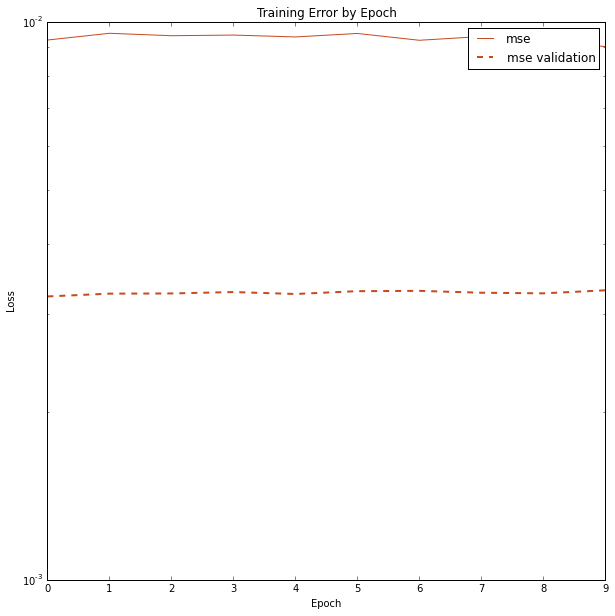

92
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0034
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0034
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0096 - val_loss: 0.0033
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0033
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0033
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0033
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0033
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0032
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0032
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0032


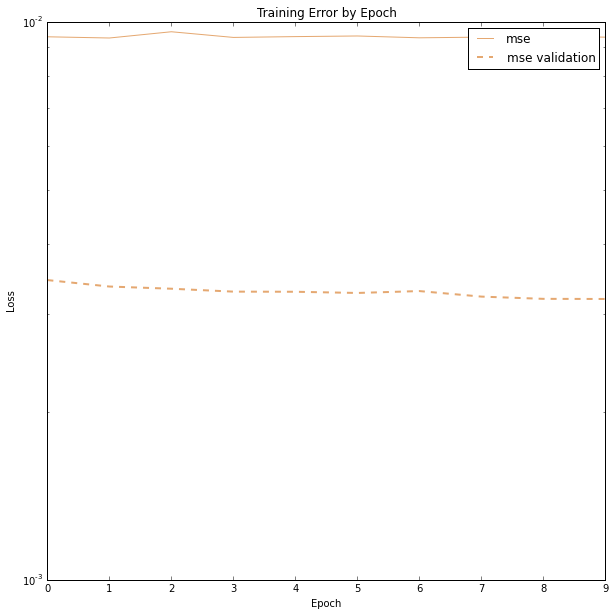

93
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0088 - val_loss: 0.0030
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0091 - val_loss: 0.0030
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0089 - val_loss: 0.0030
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0090 - val_loss: 0.0030
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0089 - val_loss: 0.0030
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0088 - val_loss: 0.0030
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0087 - val_loss: 0.0030
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0091 - val_loss: 0.0029
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0086 - val_loss: 0.0030
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0029


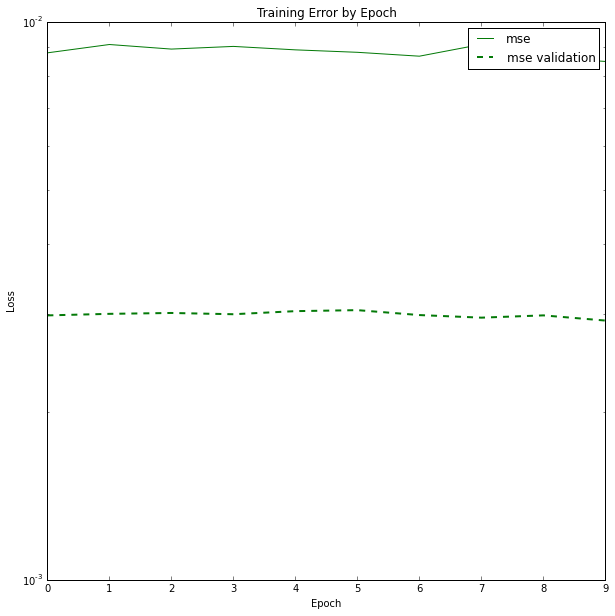

94
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0090 - val_loss: 0.0035
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0090 - val_loss: 0.0034
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0088 - val_loss: 0.0035
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0089 - val_loss: 0.0035
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0088 - val_loss: 0.0035
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0090 - val_loss: 0.0035
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0090 - val_loss: 0.0034
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0090 - val_loss: 0.0034
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0090 - val_loss: 0.0034
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0089 - val_loss: 0.0034


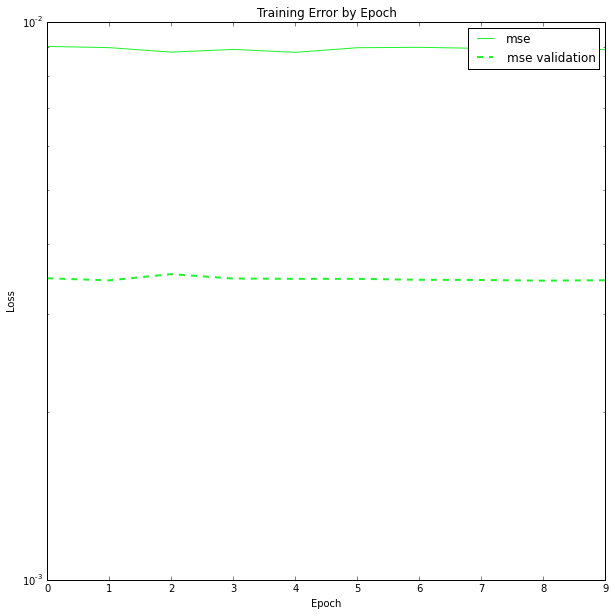

95
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0090 - val_loss: 0.0030
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0091 - val_loss: 0.0031
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0091 - val_loss: 0.0031
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0094 - val_loss: 0.0031
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0093 - val_loss: 0.0031
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0092 - val_loss: 0.0031
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0090 - val_loss: 0.0031
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0089 - val_loss: 0.0031
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0093 - val_loss: 0.0031
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0092 - val_loss: 0.0032


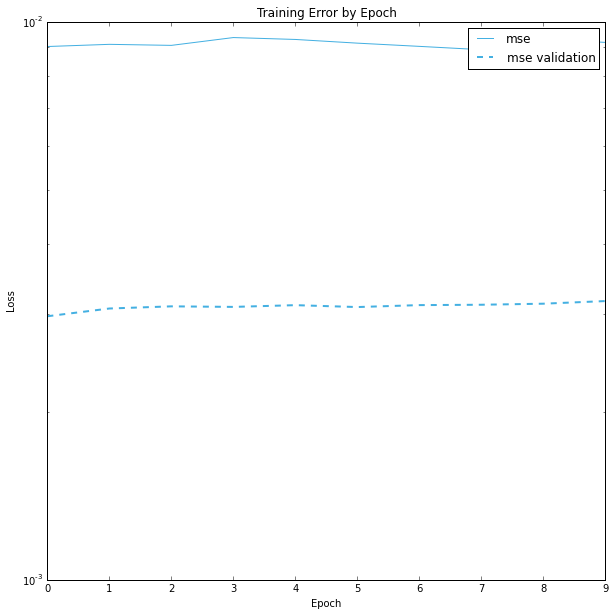

96
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0033
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0033
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0033
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0033
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0087 - val_loss: 0.0033
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0032
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0086 - val_loss: 0.0032
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0032
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0081 - val_loss: 0.0032
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0033


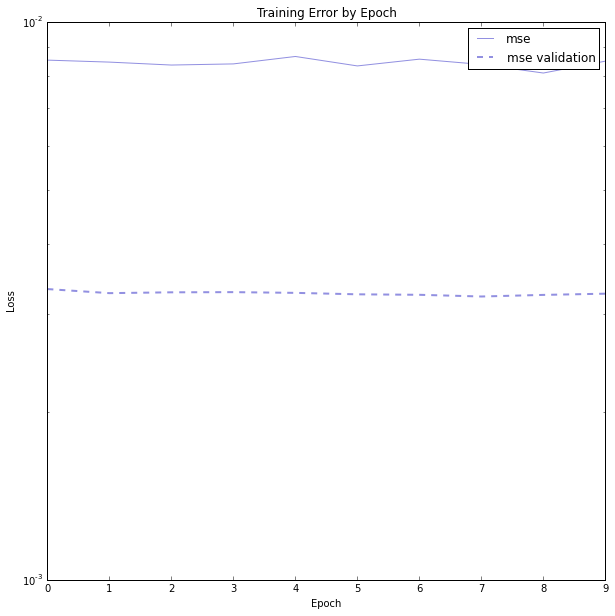

97
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0029
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0029
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0087 - val_loss: 0.0029
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0029
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0030
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0029
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0029
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0029
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0029
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0029


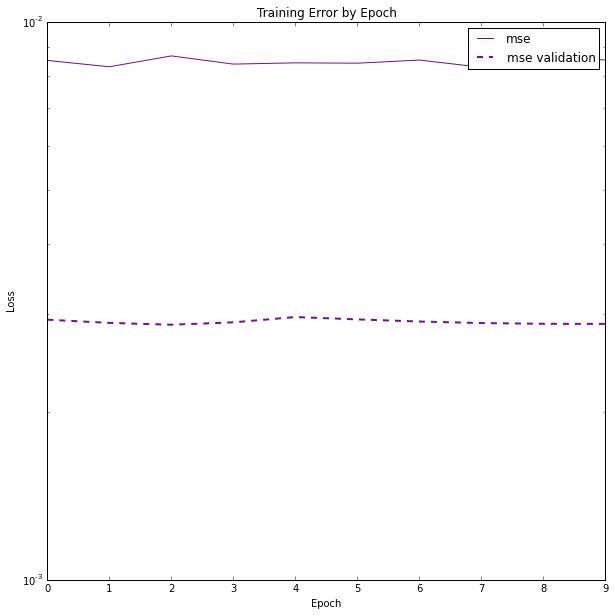

98
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0088 - val_loss: 0.0031
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0088 - val_loss: 0.0031
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0089 - val_loss: 0.0031
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0089 - val_loss: 0.0031
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0086 - val_loss: 0.0032
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0086 - val_loss: 0.0032
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0088 - val_loss: 0.0031
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0087 - val_loss: 0.0032
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0088 - val_loss: 0.0032
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0087 - val_loss: 0.0032


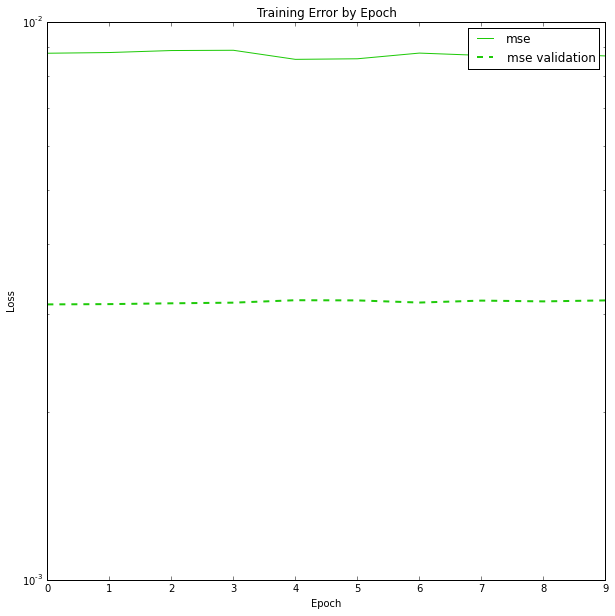

99
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0034
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0033
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0033
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0033
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0033
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0033
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0033
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0033
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0081 - val_loss: 0.0033
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0033


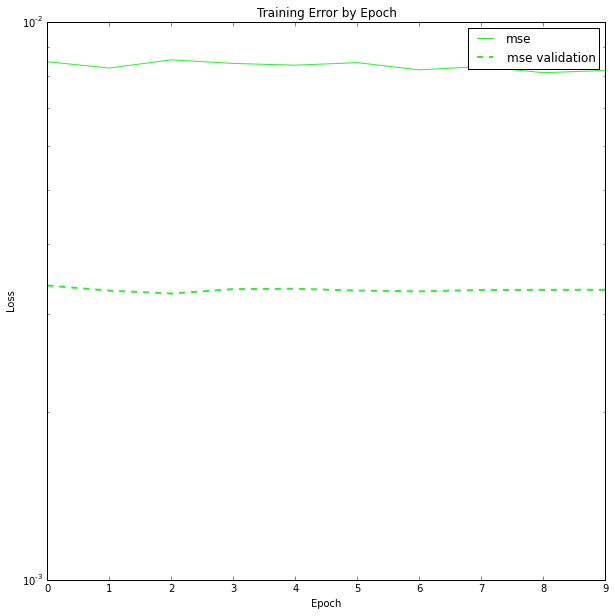

100
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0088 - val_loss: 0.0032
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0088 - val_loss: 0.0032
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0086 - val_loss: 0.0032
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0087 - val_loss: 0.0032
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0032
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0088 - val_loss: 0.0032
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0086 - val_loss: 0.0031
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0089 - val_loss: 0.0032
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0031
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0032


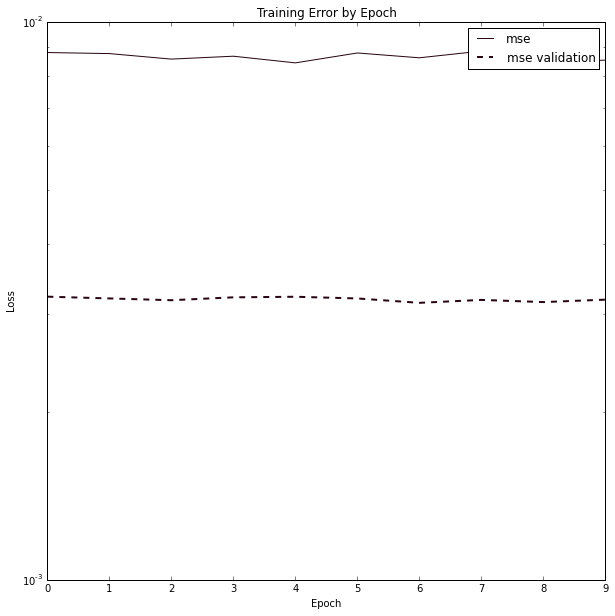

101
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0086 - val_loss: 0.0028
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0028
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0028
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0028
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0028
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0028
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0028
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0028
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0028
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0028


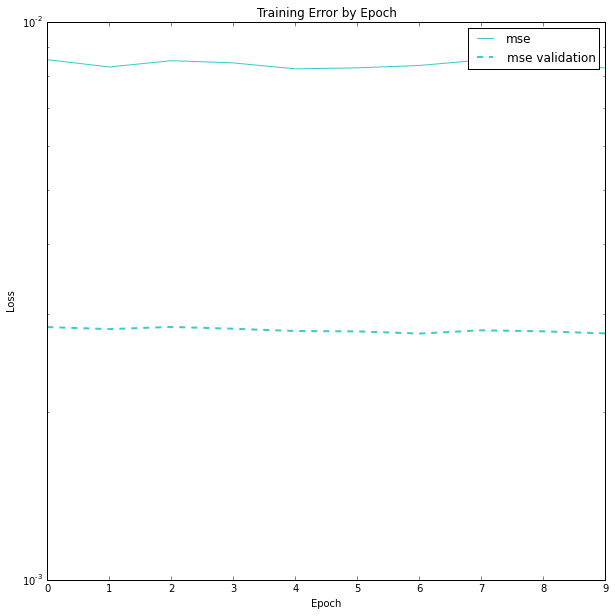

102
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0028
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0029
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0029
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0029
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0087 - val_loss: 0.0029
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0086 - val_loss: 0.0029
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0029
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0086 - val_loss: 0.0030
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0029
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0029


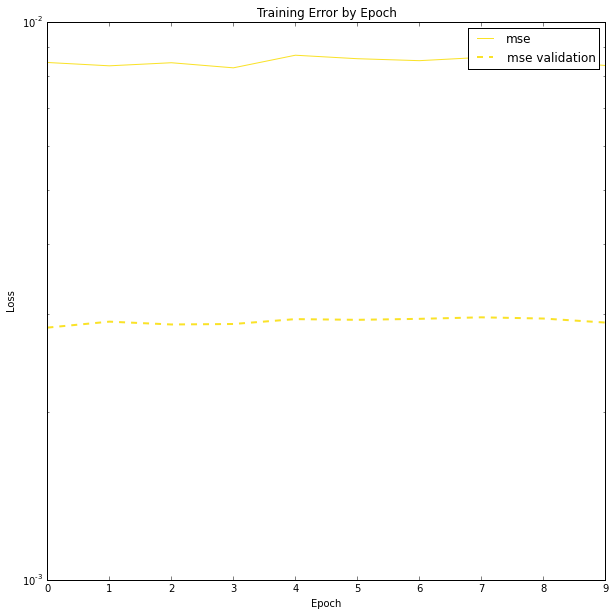

103
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0029
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0086 - val_loss: 0.0029
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0029
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0029
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0087 - val_loss: 0.0030
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0029
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0029
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0029
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0029
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0029


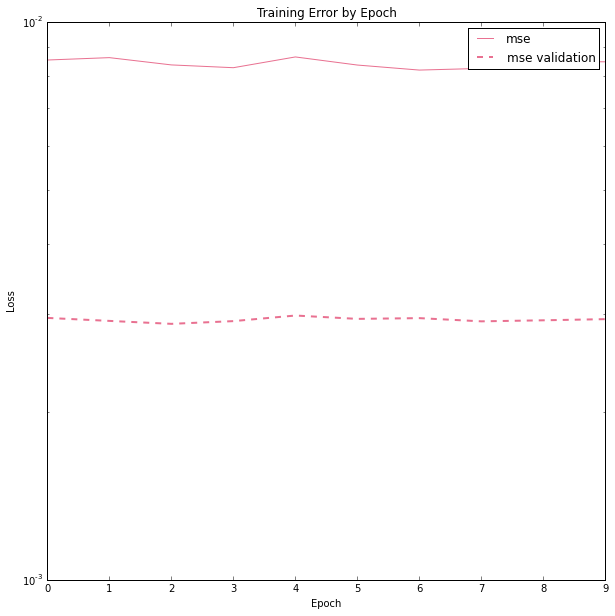

104
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0031
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0031
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0030
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0030
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0030
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0030
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0030
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0030
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0030
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0030


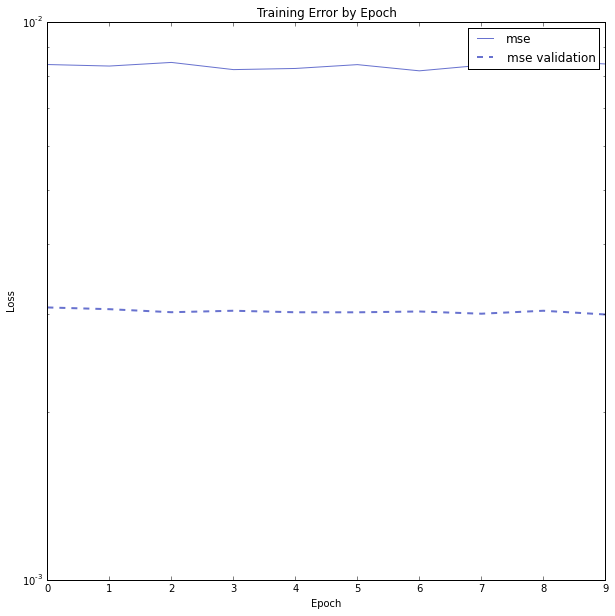

105
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0030
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0081 - val_loss: 0.0030
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0029
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0029
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0029
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0029
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0029
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0029
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0029
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0029


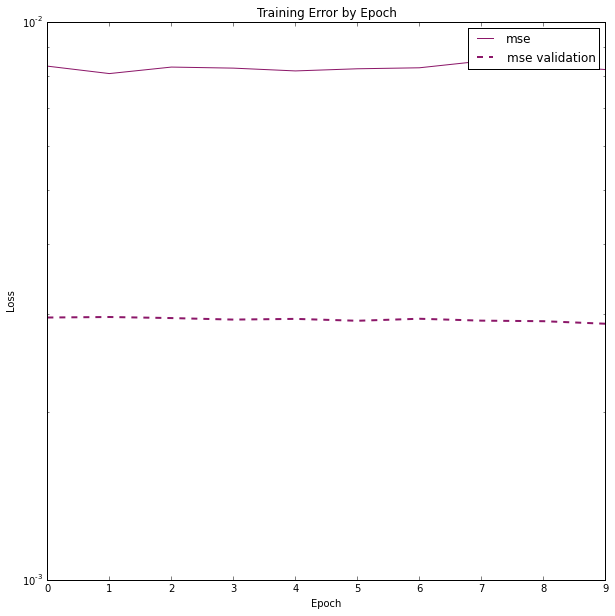

106
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0029
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0029
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0029
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0029
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0029
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0029
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0029
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0029
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0029
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0081 - val_loss: 0.0028


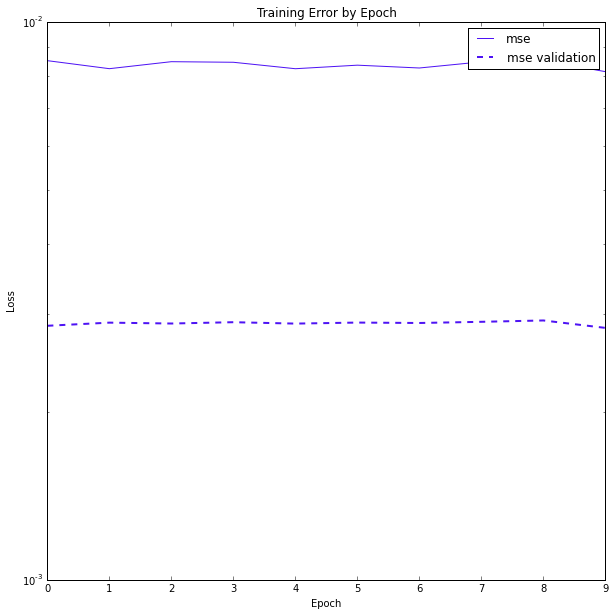

107
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0029
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0028
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0028
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0028
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0028
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0028
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0028
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0028
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0028
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0081 - val_loss: 0.0028


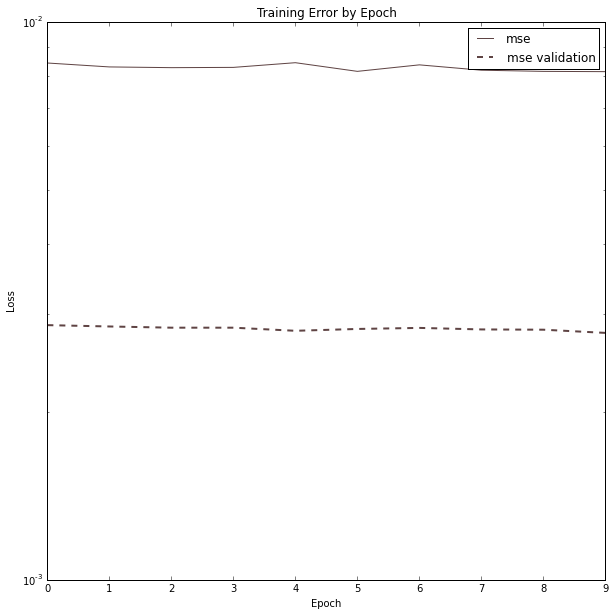

108
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0080 - val_loss: 0.0027
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0027
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0027
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0081 - val_loss: 0.0027
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0027
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0027
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0081 - val_loss: 0.0027
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0081 - val_loss: 0.0027
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0027
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0081 - val_loss: 0.0027


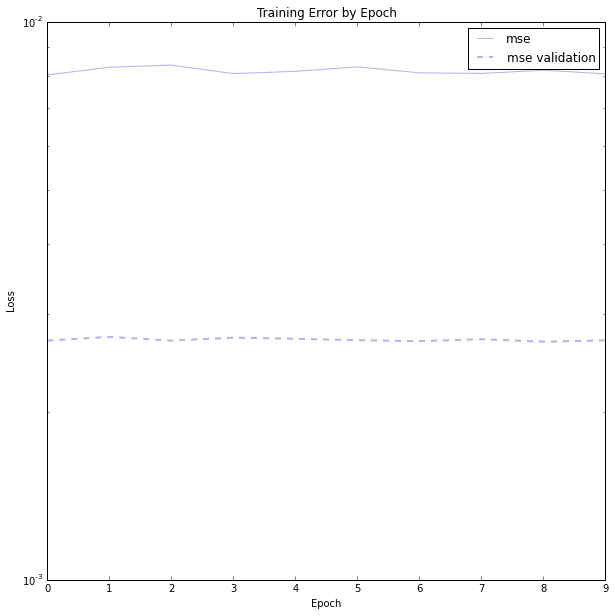

109
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s - loss: 0.0084 - val_loss: 0.0028
Epoch 2/10
8000/8000 [==============================] - 1s - loss: 0.0087 - val_loss: 0.0028
Epoch 3/10
8000/8000 [==============================] - 1s - loss: 0.0085 - val_loss: 0.0028
Epoch 4/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0028
Epoch 5/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0028
Epoch 6/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0028
Epoch 7/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0028
Epoch 8/10
8000/8000 [==============================] - 1s - loss: 0.0081 - val_loss: 0.0027
Epoch 9/10
8000/8000 [==============================] - 1s - loss: 0.0083 - val_loss: 0.0027
Epoch 10/10
8000/8000 [==============================] - 1s - loss: 0.0082 - val_loss: 0.0027


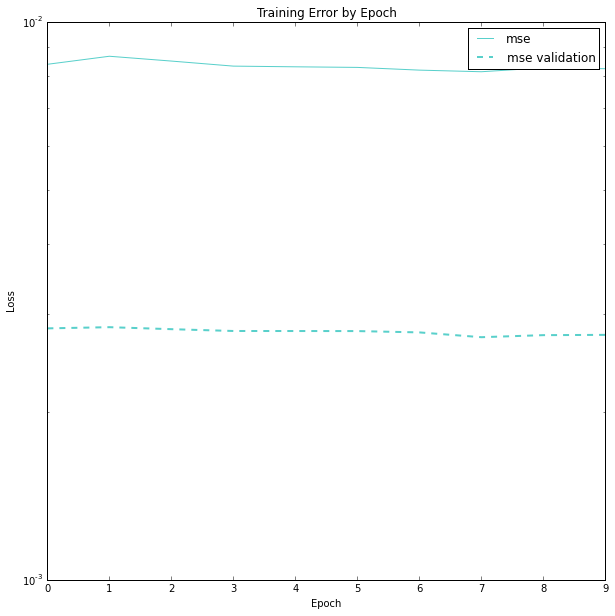

In [12]:
import numpy as np
for i in xrange(10,110):
    if i==13:
        continue
    fn ='/data/shared/LCD/EnergyScan_Gamma_Shuffled/GammaEscan_%dGeV_fulldataset.h5'%i
    f = h5py.File(fn,'r')
    train_data = np.array(f['images'])
    train_target = np.array(f['target'])[:,1]
    train_data = np.swapaxes(train_data, 1, 3)
    print(i)
    my_fit = cnn2d.fit(train_data, train_target/110., nb_epoch=10, validation_split=0.2, batch_size=2000, verbose=1 )
    show_losses( [("mse",my_fit)],"cnn2d_file%d"%i)
    f.close()
    fname = "cnn2d_file%d"%i
    loss = np.array(my_fit.history['loss'])
    valoss = np.array(my_fit.history['val_loss'])
    f = h5py.File("%s_losses.h5"%fname,"w")
    f.create_dataset('loss',data=loss)
    f.create_dataset('val_loss',data=valoss)
    f.close()
    
    
    

In [ ]:
cnn2d.layers[-1].get_weights()


In [13]:
savemodel(cnn2d,"cnn2d_fix")

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
convolution2d_5 (Convolution2D)    (None, 10, 17, 17)  4010        convolution2d_input_5[0][0]      
____________________________________________________________________________________________________
maxpooling2d_5 (MaxPooling2D)      (None, 10, 8, 8)    0           convolution2d_5[0][0]            
____________________________________________________________________________________________________
flatten_5 (Flatten)                (None, 640)         0           maxpooling2d_5[0][0]             
____________________________________________________________________________________________________
dense_17 (Dense)                   (None, 10000)       6410000     flatten_5[0][0]                  
___________________________________________________________________________________________

In [ ]:
#testing it on files with single energy levels
def test_per_energy_unshuffled(model):
    average_mse = []
    for i in xrange(10,110):
        print (i)
        
        fn =('/data/kaustuv1993/EnergyScan_Gamma/GammaEscan_%dGeV_fulldataset.h5'%i)
        f = h5py.File(fn,'r')
        test_data = np.array(f['images'])
        test_target=np.array(f['target'])
        test_data = np.swapaxes(test_data,1,3)
        #test_data= np.reshape(test_data,(10000,0))
        test_target = np.delete(test_target,0,1)
        pred = model.predict(test_data)
        print (pred*110., test_target)
        #print([test_target])
        #plt.hist( test_target - (np.ravel(pred[1]*110))/test_target[:] , label='energy resolution', bins=40)
        #plt.legend()
        #plt.show()
        #print(pred)
        #average_mse.append(pred)
    #print (average_mse)

In [ ]:
test_per_energy_unshuffled(cnn2d)

In [ ]:
json_file = open('cnn2d_2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("cnn2d_2.h5")
print("Loaded model from disk")
model.summary()

In [ ]:
model.

In [ ]:
get_1st_layer_output = K.function([model.layers[0].input, K.learning_phase()],[model.layers[1].output])
get_2nd_layer_output = K.function([model.layers[0].input, K.learning_phase()],[model.layers[2].output])
get_3rd_layer_output = K.function([model.layers[0].input, K.learning_phase()],[model.layers[3].output])
get_4th_layer_output = K.function([model.layers[0].input, K.learning_phase()],[model.layers[4].output])
get_5th_layer_output = K.function([model.layers[0].input, K.learning_phase()],[model.layers[5].output])
get_6th_layer_output = K.function([model.layers[0].input, K.learning_phase()],[model.layers[6].output])

In [ ]:
l=model.layers[4]

In [ ]:
l.name

In [ ]:
w = l.get_weights()

In [ ]:
w[0].shape

In [ ]:
fn =('/data/shared/LCD/EnergyScan_Gamma_Shuffled/GammaEscan_%dGeV_fulldataset.h5'%10)
f = h5py.File(fn,'r')
test_data = np.swapaxes(f['images'],1,3)
test_target=f['target'][:,1]


In [ ]:
X =test_data[23].reshape(1,25,20,20)
o = get_3rd_layer_output([X, 1])[0]
print o.shape
o

In [ ]:
set(X.ravel())

In [ ]:
len(set(o.ravel()))

In [ ]:
o.dot(w[0])+w[1]

In [ ]:
o = get_4th_layer_output([X, 1])[0]
print o.shape
o

In [ ]:
#testing it on shuffled files
def test_per_energy_shuffled(model):
    average_mse = []
    for i in xrange(10,11):
        print (i)
        if i==13:
            continue #because we don't have a file number 13.
        fn =('/data/shared/LCD/EnergyScan_Gamma_Shuffled/GammaEscan_%dGeV_fulldataset.h5'%i)
        f = h5py.File(fn,'r')
        test_data = np.array(f['images'])
        test_target=np.array(f['target'])
        test_data = np.swapaxes(test_data,1,3)
        #test_data= np.reshape(test_data,(10000,0))
        test_target = np.delete(test_target,0,1)
        for j in xrange(0,test_data.shape[0]):
            X =test_data[j].reshape(1,25,20,20)
            pred = model.predict(X)
            layer1_output = get_1st_layer_output([X, 1])[0]
            layer2_output = get_2nd_layer_output([X, 1])[0]
            layer3_output = get_3rd_layer_output([X, 1])[0]
            layer4_output = get_4th_layer_output([X, 1])[0]
            layer5_output = get_5th_layer_output([X, 1])[0]
            layer6_output = get_6th_layer_output([X, 1])[0]
        
            print (pred*110., test_target[j])
            print(X)
            print('layer1', layer1_output)
            print('layer2', layer2_output) 
            print('layer3', layer3_output)
            print('layer4', layer4_output)
            print('layer5', layer5_output)
            print('layer6', layer6_output)
            break
        #print([test_target])
        #plt.hist( test_target - (np.ravel(pred[1]*110))/test_target[:] , label='energy resolution', bins=40)
        #plt.legend()
        #plt.show()
        #print(pred)
        #average_mse.append(pred)
    #print (average_mse)

10
(6.9002820744141937, 7.119983474341887)
11
(6.7139362777173517, 6.962698227514863)
12
(6.5038200574368235, 6.789194794464563)
13
(1.654488697654009, 6.02400816540455)
14
(6.0665167908892039, 6.457158165037374)
15
(5.8875261939540504, 6.325745036061913)
16
(5.7026893119439483, 6.195518581356734)
17
(5.4713201407641172, 6.059684343626107)
18
(5.3090545076355342, 5.931984541354389)
19
(5.0985253925547003, 5.809380576872161)
20
(4.9224025526866315, 5.71412037229936)
21
(4.7061532872617242, 5.605802388788229)
22
(4.4731677439510822, 5.551416314569967)
23
(4.4300172371938826, 5.391984670700105)
24
(4.2486098506674175, 5.3837858870045325)
25
(4.0664813134223223, 5.282362697270516)
26
(3.8651649057567119, 5.303642199001931)
27
(3.7482248324379324, 5.2015806185624545)
28
(3.601209852218628, 5.1158161246471945)
29
(3.5090368860661982, 5.078804287307265)
30
(3.409273209787905, 5.1235551704052105)
31
(3.2086043566614388, 5.042264018576079)
32
(3.153203516550362, 4.995556992250837)
33
(2.9049439

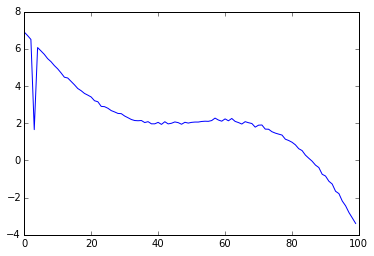

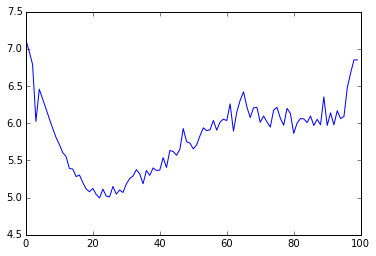

In [22]:
import math
md = []
rmsd = []
for i in xrange(10,110):
    print (i)
    #if i==13:
    #     continue
    fn =('/data/kaustuv1993/EnergyScan_Gamma/GammaEscan_%dGeV_fulldataset.h5'%i)
    f = h5py.File(fn,'r')
    test_data = np.array(f['images'])
    test_target=np.array(f['target'])
    test_data = np.swapaxes(test_data,1,3)
    #test_data= np.reshape(test_data,(10000,0))
    test_target = np.delete(test_target,0,1)
    pred = cnn2d.predict(test_data)
    mean = np.mean(pred*110- test_target)
    diff = (np.mean((pred*110-test_target)**2))
    rmsde = math.sqrt((diff))
    print (mean, rmsde)
    md.append(mean)
    rmsd.append(rmsde)

plt.plot(md)
plt.savefig('Mean error per energy.pdf')
plt.show()

plt.plot(rmsd)
plt.savefig('RMSD error per energy.pdf')
plt.show() 

In [20]:
test_per_energy_shuffled(cnn2d)

10
(array([[ 46.7356655 ],
       [ 30.15028268],
       [ 87.342062  ],
       ..., 
       [ 67.5188905 ],
       [ 34.35830057],
       [ 23.22663009]]), array([[ 44.],
       [ 26.],
       [ 83.],
       ..., 
       [ 67.],
       [ 26.],
       [ 17.]]))
35.5409075951
11
(array([[ 61.79279447],
       [ 53.5004735 ],
       [ 48.77506495],
       ..., 
       [ 42.42021918],
       [ 99.40837622],
       [ 68.64551544]]), array([[  60.],
       [  53.],
       [  46.],
       ..., 
       [  38.],
       [ 103.],
       [  64.]]))
34.1113553757
12
(array([[ 19.97253209],
       [ 55.09135842],
       [ 37.63407767],
       ..., 
       [ 65.96360743],
       [ 94.54391718],
       [ 52.28927284]]), array([[ 13.],
       [ 50.],
       [ 36.],
       ..., 
       [ 66.],
       [ 96.],
       [ 52.]]))
35.4414121196
13
14
(array([[ 51.72574401],
       [ 14.0764159 ],
       [ 20.58539867],
       ..., 
       [ 38.78685653],
       [ 66.31482005],
       [ 48.31136227]]), array(

KeyboardInterrupt: 

In [ ]:
md = []
for i in xrange(10,110):
    print (i)
    #if i==13:
    #     continue
    fn =('/data/kaustuv1993/EnergyScan_Gamma/GammaEscan_%dGeV_fulldataset.h5'%i)
    f = h5py.File(fn,'r')
    test_data = np.array(f['images'])
    test_target=np.array(f['target'])
    test_data = np.swapaxes(test_data,1,3)
    #test_data= np.reshape(test_data,(10000,0))
    test_target = np.delete(test_target,0,1)
    pred = cnn2d.predict(test_data)
    mean = np.mean(pred*110- test_target)
    print (mean)
    md.append(mean)

plt.plot(md)
plt.show()
            
        #print([test_target])
        #plt.hist( test_target - (np.ravel(pred[1]*110))/test_target[:] , label='energy resolution', bins=40)
        #plt.legend()
        #plt.show()
        #print(pred)
        #average_mse.append(pred)
    #print (average_mse)

In [1]:
import numpy as np
a = np.arange(1,5)
a

array([1, 2, 3, 4])